# 필요 라이브러리 호출

In [1]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

# 폰트 지정

In [2]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

# 데이터 호출 및 필요없는 컬럼 드랍

In [3]:
df = pd.read_csv("usage_by_weather2.csv")
df = df.drop(columns = ['Unnamed: 0', 'customer', 'wh'])
df.head(3)

year  month  day  temp  cloud  rainfall_total  Humidity_mean  solar  \
0  2021      1    1  -0.6    7.3             0.0           83.1   9.00   
1  2021      1    2  -0.3    3.8             0.5           67.8  12.54   
2  2021      1    3  -0.6    7.3             0.0           54.6  10.37   

           kwh  
0  11154070.87  
1  10820313.94  
2  10577876.27

In [4]:
df_kwh = pd.DataFrame(df['kwh'])
df_kwh.max()

kwh    33619790.7
dtype: float64

In [5]:
# def replace_outliers_with_mean(df, sd=0.5):
#     import pandas as pd
#     import numpy as np

#     new_df = pd.DataFrame(index=df.index, columns=df['kwh'])
    
#     for col in df.columns:
#         col_mean = df[col].mean() # 열의 평균 계산
#         col_std = df[col].std() # 열의 표준편차 계산
        
#         mask = np.abs(df[col] - col_mean) > sd * col_std # 평균에서  표준편차값(sd) 이상 떨어진 값들을 찾아내는 마스크 생성
#         new_df[col] = df[col].where(~mask, col_mean) # 마스크에 해당하는 값들을 평균값으로 대체
    
#     return new_df


# df = replace_outliers_with_mean(df)

In [6]:
df_kwh = pd.DataFrame(df['kwh'])
df_kwh

kwh
0    11154070.87
1    10820313.94
2    10577876.27
3    11410542.58
4    11097614.74
..           ...
725   9442942.40
726   9679363.18
727  11754265.48
728  12149583.10
729  11472992.97

[730 rows x 1 columns]

# 일수에 따른 전력 사용량 그래프

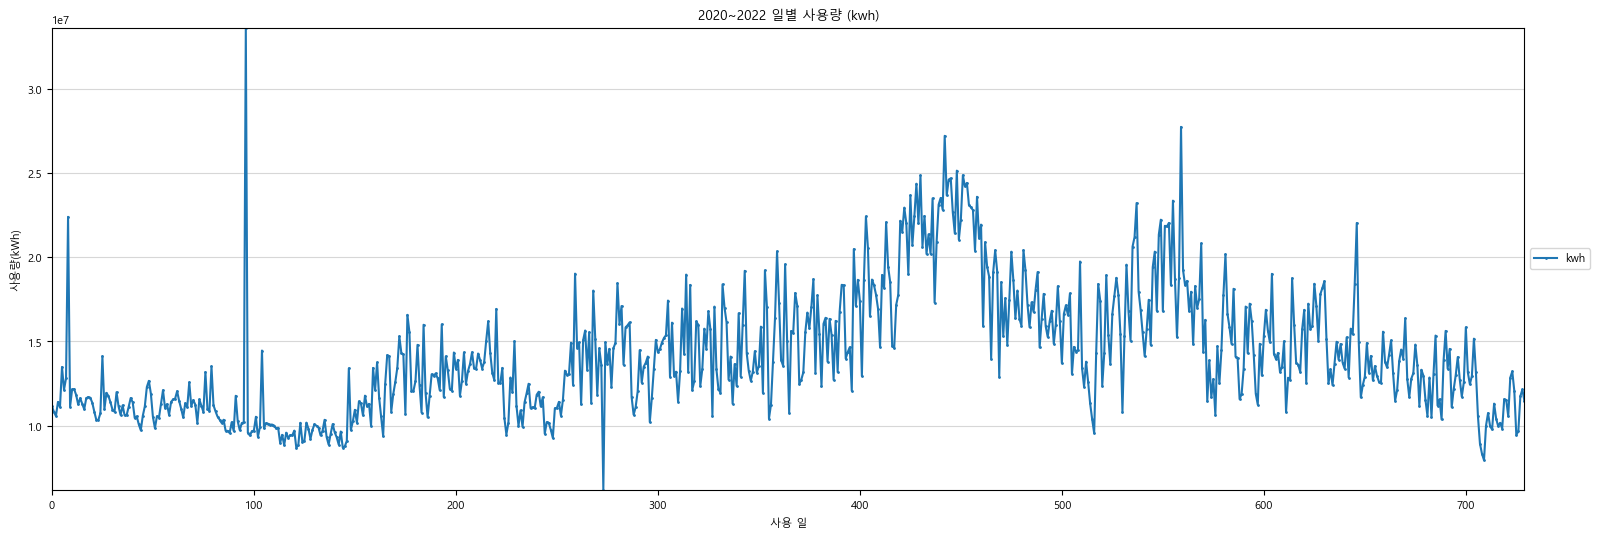

In [7]:
# 그래프 크기 설정
plt.figure(figsize=(19, 6))

# 데이터프레임을 이용하여 그래프 그리기
plt.plot(df_kwh, marker='o', markersize=1)

# y축에 그리드 추가
plt.grid(axis='y', linestyle='-', alpha=0.5)

# 그래프 범례를 그래프 밖에 위치
plt.legend(df_kwh.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# 그래프 제목 설정
plt.title('2020~2022 일별 사용량 (kwh)')

# x축 레이블 설정
plt.xlabel('사용 일')

# y축 레이블 설정
plt.ylabel('사용량(kWh)')

# x, y축 범위 자동으로 설정
plt.autoscale(axis='x', tight=True)
plt.autoscale(axis='y', tight=True)

# 그래프 출력
plt.show()


# 데이터 프레임 -> 피봇 테이블

In [8]:
kw_df_year_month_day = df.pivot_table(index=['day'], 
                                     columns='month',
                                     values='kwh', 
                                     aggfunc='sum')
kw_df_year_month_day

month           1            2            3            4            5   \
day                                                                      
1      21924744.84  22895338.06  30392843.69  32644171.15  27033443.58   
2      26440046.20  32469746.59  35231834.65  34569349.99  25438913.95   
3      26074029.46  28254555.62  32321892.68  30653352.98  26941573.52   
4      29287287.38  29294151.82  34489694.99  33323073.89  29289014.51   
5      28219811.70  28616964.08  35826242.30  31272415.26  23688549.83   
6      25956920.41  23559656.50  33012149.94  32135184.04  25432890.91   
7      24864321.03  29272881.93  35340364.02  49528390.20  28005449.39   
8      25984877.53  33535249.74  31962235.87  30478572.98  25732159.02   
9      37956215.01  32173645.38  33542737.81  28859551.81  24482457.71   
10     27841557.44  27883830.22  32764613.32  28520561.64  25972095.03   
11     27931564.46  29136625.28  32525904.37  23692985.30  26905705.78   
12     29228748.35  28890397.23  31719329.46  29638018.53  24864275.07   
13     30523846.85  27862713.44  34742625.51  29750745.70  25885374.79   
14     24421225.60  26672311.22  27475348.31  29059349.83  27705049.80   
15     29364677.26  25254218.46  32473054.71  27360816.33  25904246.91   
16     26782123.17  30091669.04  34318546.70  28371276.91  24057855.94   
17     23305118.26  30463477.92  34336751.26  25472919.63  25963700.25   
18     27673192.56  34737725.02  35992827.59  27683704.55  26019476.89   
19     28108980.73  31332005.65  38213132.76  24866537.85  26093310.44   
20     25461289.70  29066855.51  34564509.14  27555648.86  27945038.10   
21     27700011.39  24591571.87  38125279.73  30339141.10  22689260.03   
22     26218347.15  25168560.86  35896370.55  28452480.68  23986956.53   
23     23056740.80  27653222.74  33528193.63  26244119.22  23274601.33   
24     26564698.65  29066624.52  31953519.62  27006268.29  24145339.97   
25     23915237.39  34269577.12  35501660.58  25804498.31  28446170.46   
26     30894179.84  32587204.52  31209826.75  24789697.42  22190624.19   
27     29349781.24  34219382.76  32587189.75  30003567.31  21416446.02   
28     30281126.07  32656364.64  34568079.48  28486544.19  27207185.72   
29     25748576.40          NaN  33897638.88  26630836.10  22352598.38   
30     25754063.79          NaN  33973683.09  25272002.67  21593257.13   
31     25604966.23          NaN  33309703.09          NaN  21332310.31   

month           6            7            8            9            10  \
day                                                                      
1      19728230.06  35128467.98  28608079.22  24870903.43  21050310.76   
2      25777572.90  29225867.31  25912928.89  23007591.88  28691906.33   
3      29727575.35  32113913.72  28242517.57  25223327.25  27053991.64   
4      28024767.84  38216032.50  32803767.93  20979580.46  29804931.48   
5      24150214.87  28731915.66  36366650.69  22600527.26  25161451.19   
6      25446951.44  32362830.73  30978372.22  21983894.46  30360772.27   
7      30226856.45  33589593.74  28988503.50  29788316.31  30340798.56   
8      25393717.66  35085235.81  27570424.60  27056131.60  36877316.13   
9      27083860.49  31299771.87  35055115.71  25146171.70  38069985.50   
10     28749633.64  36457898.66  26632945.26  24229034.09  32063947.31   
11     31436665.28  31511394.83  26554513.27  24740393.02  25304386.06   
12     30439743.09  27366822.46  25005675.27  29019342.63  28253490.25   
13     28315620.76  34798447.83  22358471.85  29886028.57  28872225.96   
14     24806623.17  39437351.49  22865910.62  25613437.31  31036470.37   
15     23323922.04  33352769.52  27252517.12  32170766.40  24856596.66   
16     29508283.89  31636536.33  27165031.75  28185791.11  24790687.34   
17     33676097.91  30783377.79  29236052.05  34916933.41  23794054.41   
18     27624732.98  28875103.43  31221130.82  33057665.73  25574481.29   
19     26926141.32  32295069.09  25406386.08  32070073.09  27445184.57   
20 

# 월별 날짜에 따른 전력 사용량 축적치

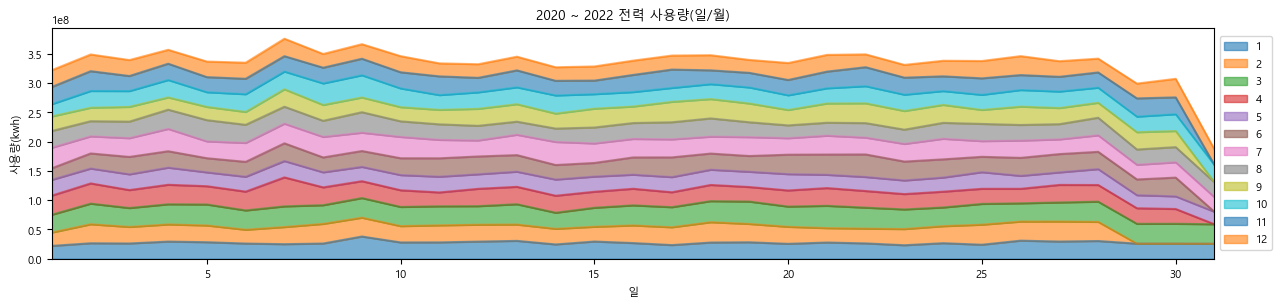

In [9]:
title='2020 ~ 2022 전력 사용량(일/월)'
ylabel='사용량(kwh)'
xlabel='일'



ax = kw_df_year_month_day.plot.area(figsize=(15,3),alpha=0.6, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [10]:
df_type = df
kw_df = df_type.groupby(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar'])['kwh'].sum()
kw_df = kw_df.to_frame().reset_index()
kw_df

year  month  day  temp  cloud  rainfall_total  Humidity_mean  solar  \
0    2021      1    1  -0.6    7.3             0.0           83.1   9.00   
1    2021      1    2  -0.3    3.8             0.5           67.8  12.54   
2    2021      1    3  -0.6    7.3             0.0           54.6  10.37   
3    2021      1    4   1.2    3.1             0.0           71.8  10.07   
4    2021      1    5  -0.2    8.0             0.0           64.9   7.74   
..    ...    ...  ...   ...    ...             ...            ...    ...   
725  2022     12   27   0.3    1.8             0.0           74.1  13.08   
726  2022     12   28  -0.2    5.3             0.0           75.4   9.62   
727  2022     12   29   0.7    2.1             0.0           63.3  12.25   
728  2022     12   30   1.0    6.3             0.0           70.4   9.25   
729  2022     12   31   1.4    1.4             0.0           66.1  12.02   

             kwh  
0    11154070.87  
1    10820313.94  
2    10577876.27  
3    11410542.58  
4    11097614.74  
..           ...  
725   9442942.40  
726   9679363.18  
727  11754265.48  
728  12149583.10  
729  11472992.97  

[730 rows x 9 columns]

# 기온과 전력 소비량 시각화

<AxesSubplot:title={'center':'기온에 따른 소비량(일)'}, xlabel='temp', ylabel='kwh'>

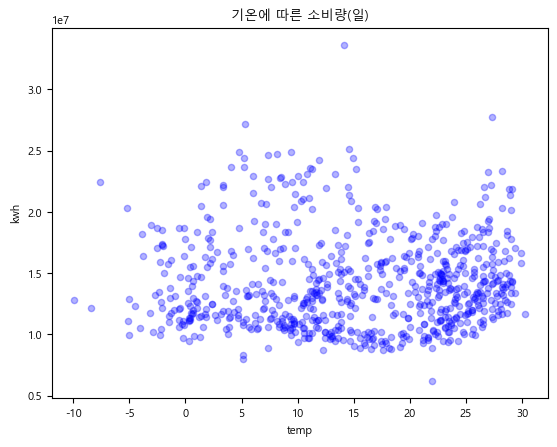

In [11]:
title='기온에 따른 소비량(일)'
ylabel='전력 소비량(kwh)'
xlabel='기온'
df.plot.scatter(x='temp', y='kwh', c='blue', cmap='coolwarm',alpha=0.3, title=title)

# 날씨와 전력 소비량의 상관관계 시각화(일 기준)

In [12]:
column_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량'}

for feature in column_df:
    fig = px.scatter(kw_df,
                    x="temp",
                    y="kwh",
                    title='날씨와 전력 소비량의 상관관계(일)',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'kwh': '전력량(kWh)', feature: col_label[feature]})
    fig.show()

In [13]:
# Box plot 생성
_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '일사량'}

for feature in _df:
    # Box plot 생성
    box = go.Box(x=kw_df[feature], y=kw_df['kwh'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력 소비량의 상관관계(일)', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kwh)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [14]:
# Heatmap 생성
_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '일사량'}

for feature in _df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['kwh'], z=kw_df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력 소비량의 상관관계(일)                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kwh)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

In [15]:
kw_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'kwh'],
      dtype='object')

___일단위로는 적합하지 않은 그래프___

In [16]:
day1_df	= df.query('day == 1')
day2_df	= df.query('day == 2')
day3_df	= df.query('day == 3')
day4_df	= df.query('day == 4')
day5_df	= df.query('day == 5')
day6_df	= df.query('day == 6')
day7_df	= df.query('day == 7')
day8_df	= df.query('day == 8')
day9_df	= df.query('day == 9')
day10_df	= df.query('day == 10')
day11_df	= df.query('day == 11')
day12_df	= df.query('day == 12')
day13_df	= df.query('day == 13')
day14_df	= df.query('day == 14')
day15_df	= df.query('day == 15')
day16_df	= df.query('day == 16')
day17_df	= df.query('day == 17')
day18_df	= df.query('day == 18')
day19_df	= df.query('day == 19')
day20_df	= df.query('day == 20')
day21_df	= df.query('day == 21')
day22_df	= df.query('day == 22')
day23_df	= df.query('day == 23')
day24_df	= df.query('day == 24')
day25_df	= df.query('day == 25')
day26_df	= df.query('day == 26')
day27_df	= df.query('day == 27')
day28_df	= df.query('day == 28')
day29_df	= df.query('day == 29')
day30_df	= df.query('day == 30')
day31_df	= df.query('day == 31')

day_dic = [day1_df,
            day2_df,
            day3_df,
            day4_df,
            day5_df,
            day6_df,
            day7_df,
            day8_df,
            day9_df,
            day10_df,
            day11_df,
            day12_df,
            day13_df,
            day14_df,
            day15_df,
            day16_df,
            day17_df,
            day18_df,
            day19_df,
            day20_df,
            day21_df,
            day22_df,
            day23_df,
            day24_df,
            day25_df,
            day26_df,
            day27_df,
            day28_df,
            day29_df,
            day30_df,
            day31_df]


typename = {1	: '1일',
2	: '2일',
3	: '3일',
4	: '4일',
5	: '5일',
6	: '6일',
7	: '7일',
8	: '8일',
9	: '9일',
10	: '10일',
11	: '11일',
12	: '12일',
13	: '13일',
14	: '14일',
15	: '15일',
16	: '16일',
17	: '17일',
18	: '18일',
19	: '19일',
20	: '20일',
21	: '21일',
22	: '22일',
23	: '23일',
24	: '24일',
25	: '25일',
26	: '26일',
27	: '27일',
28	: '28일',
29	: '29일',
30	: '30일',
31	: '31일'}



C:\Users\admin\AppData\Local\Temp\ipykernel_41268\534243473.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



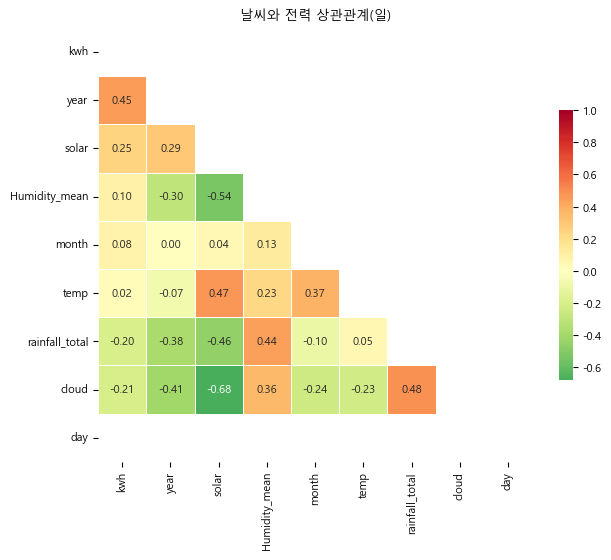

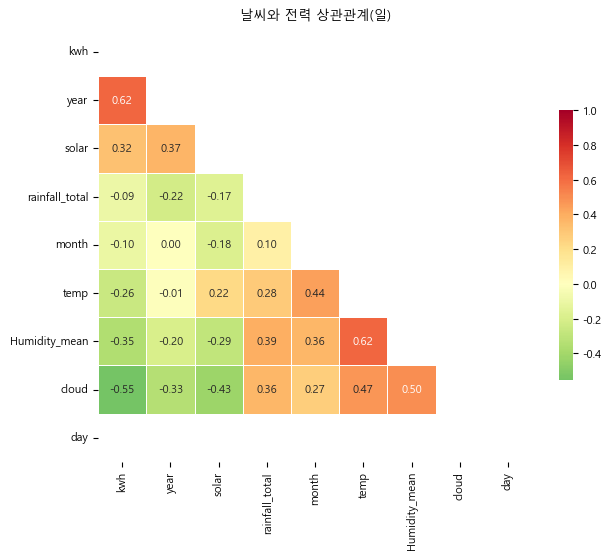

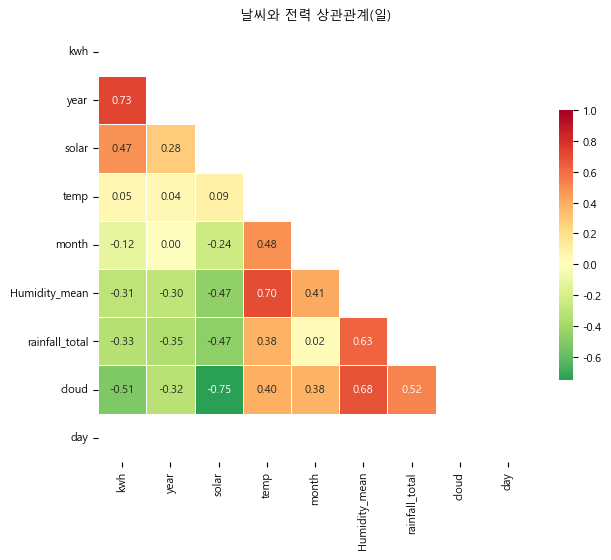

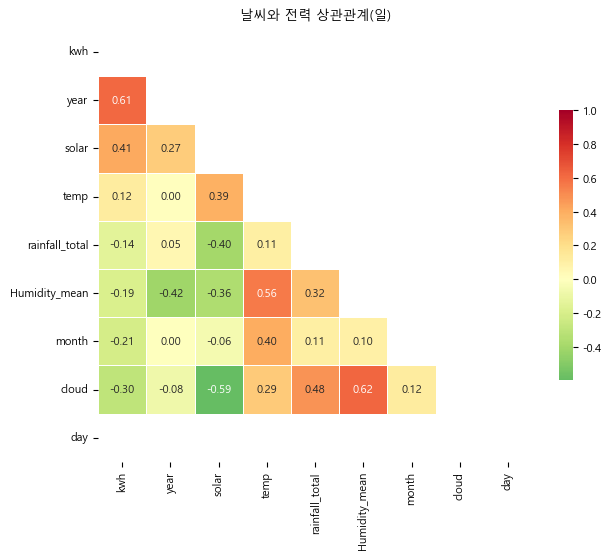

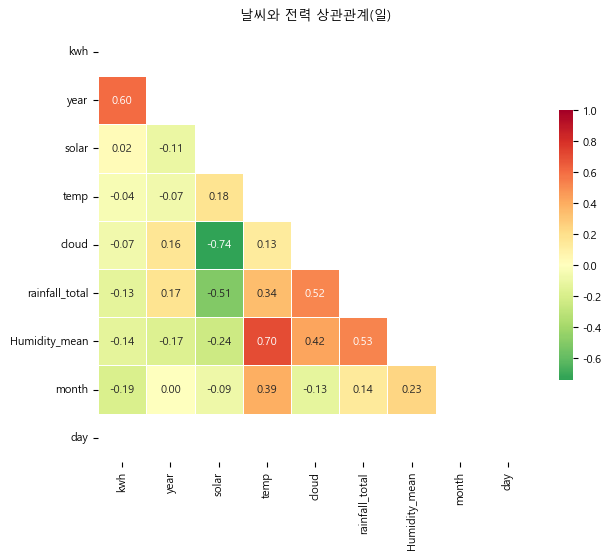

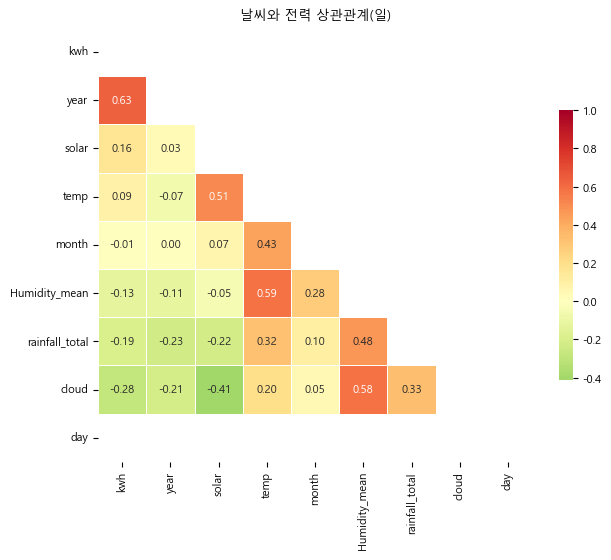

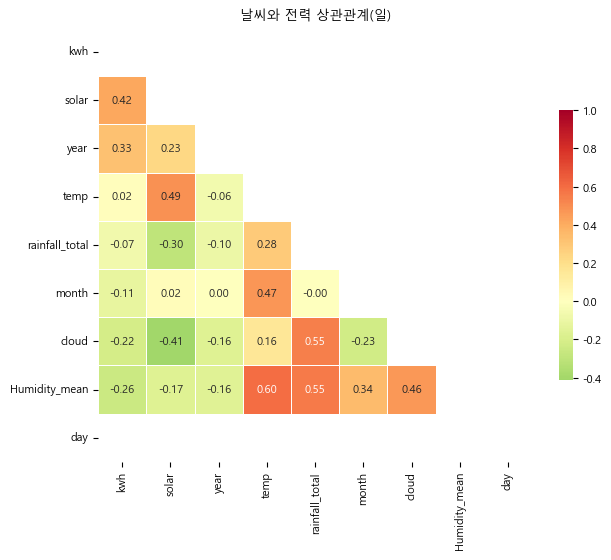

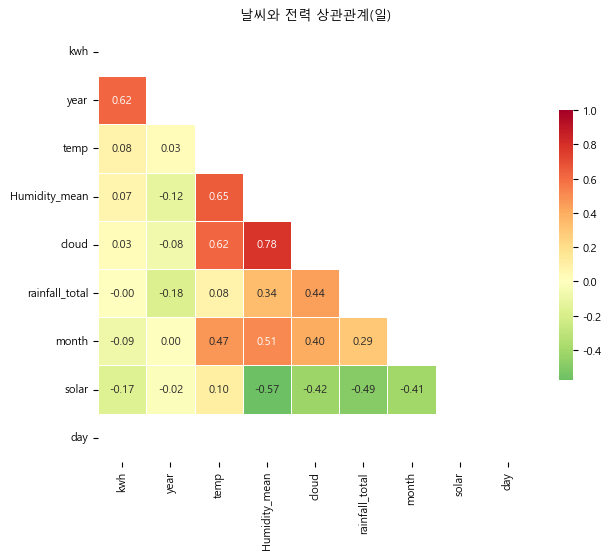

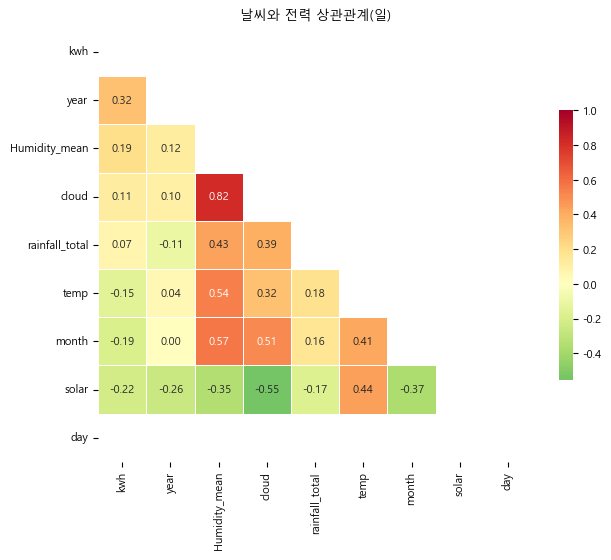

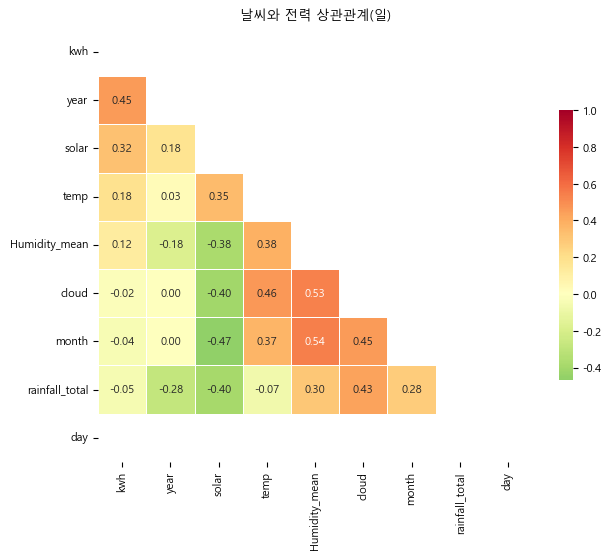

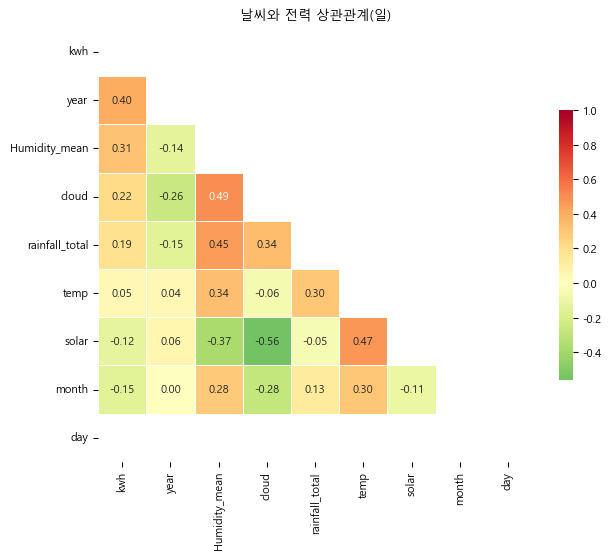

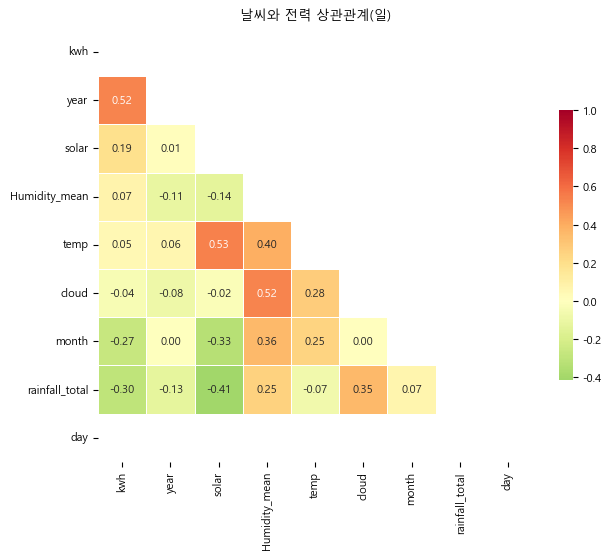

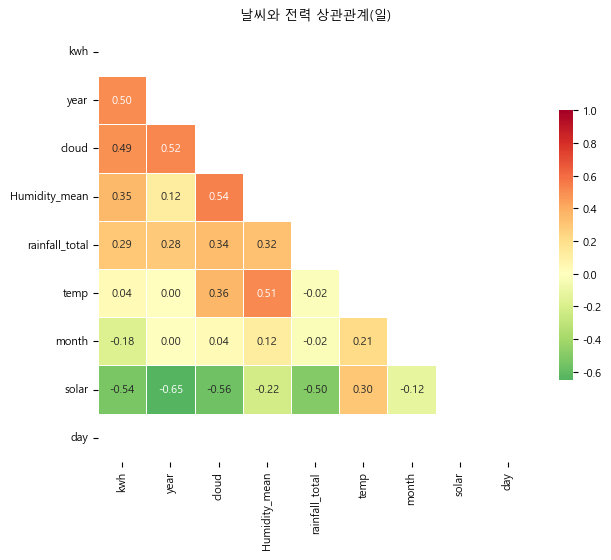

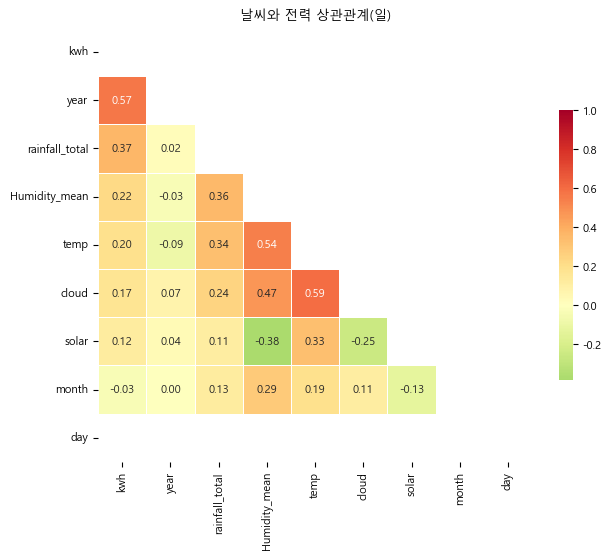

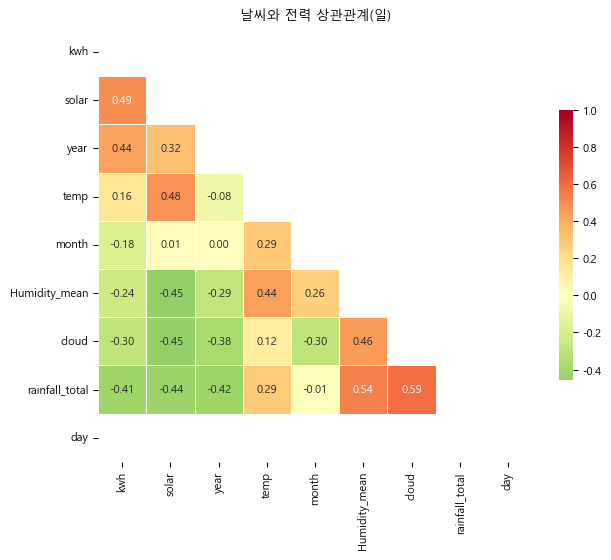

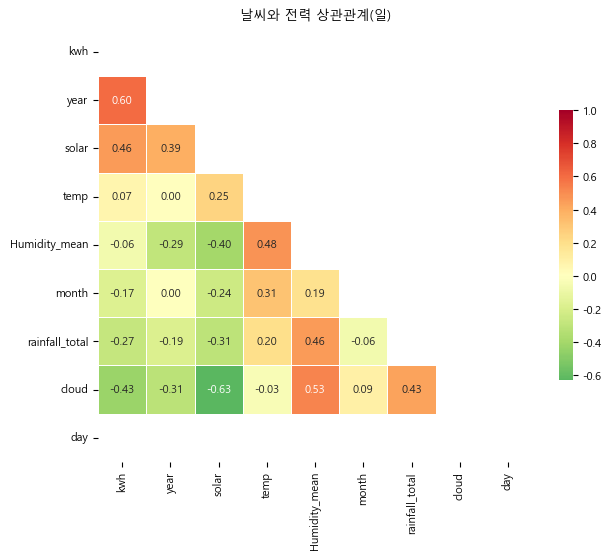

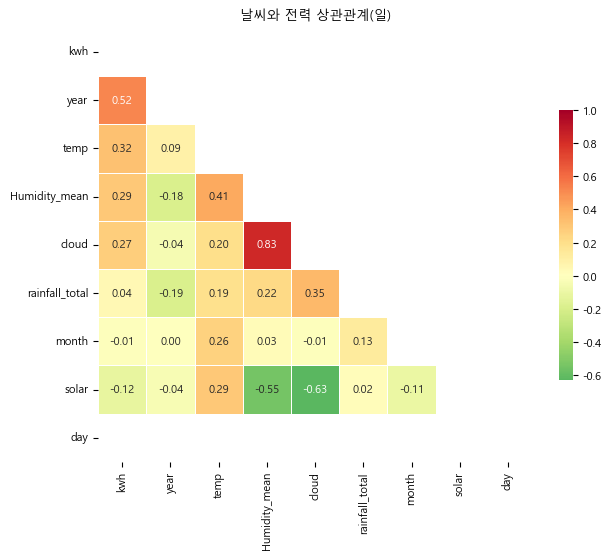

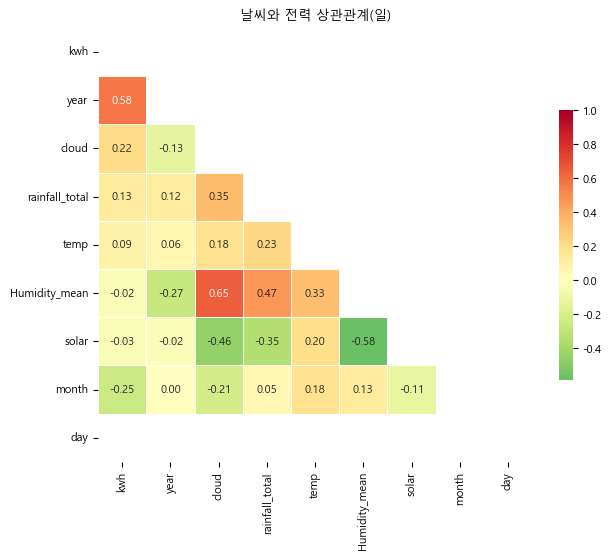

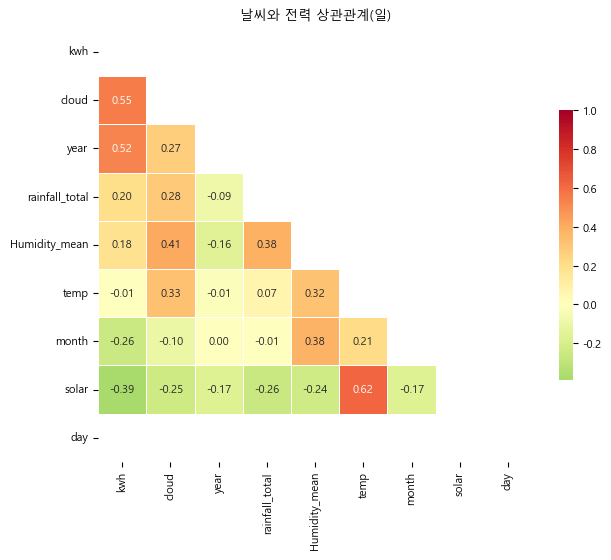

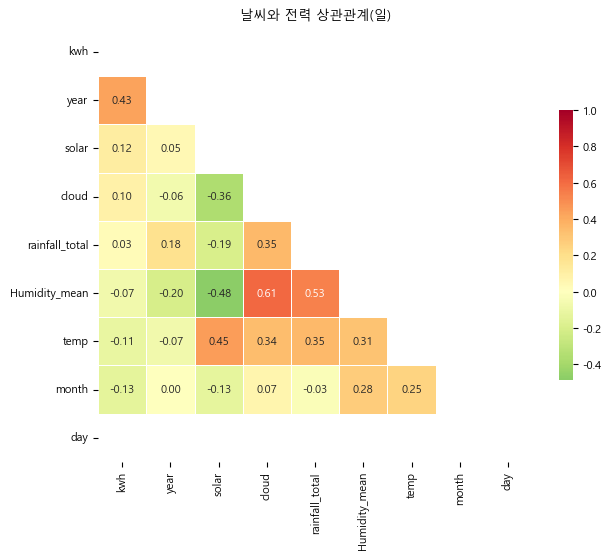

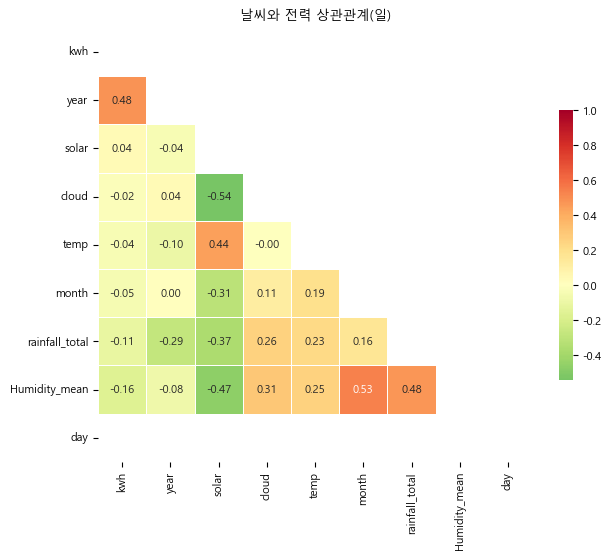

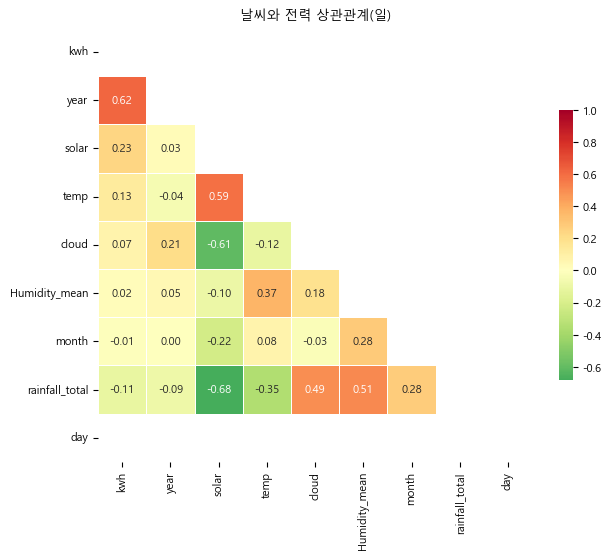

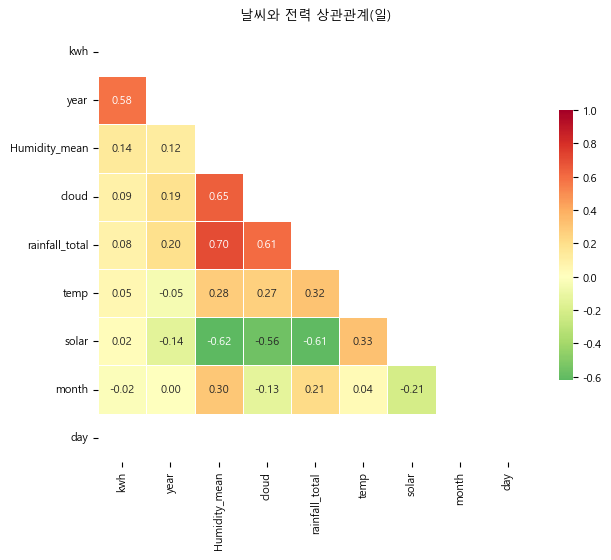

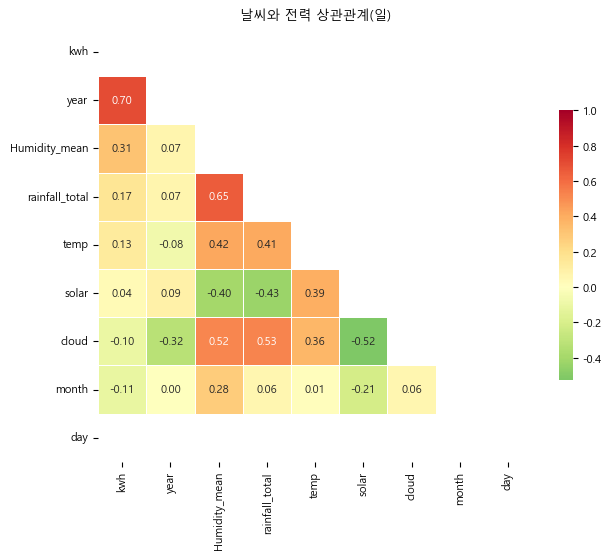

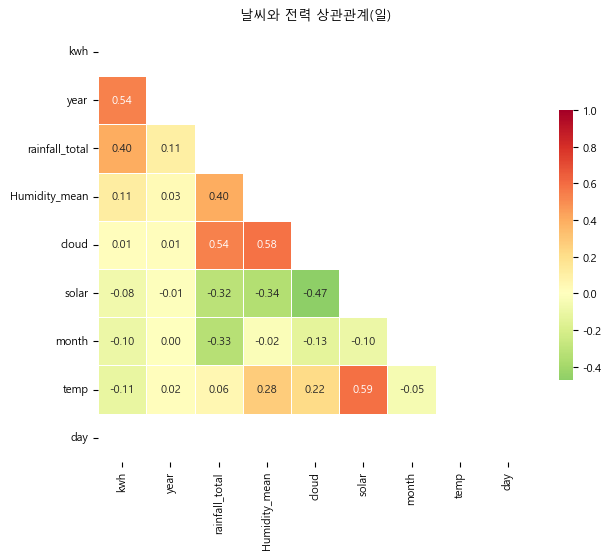

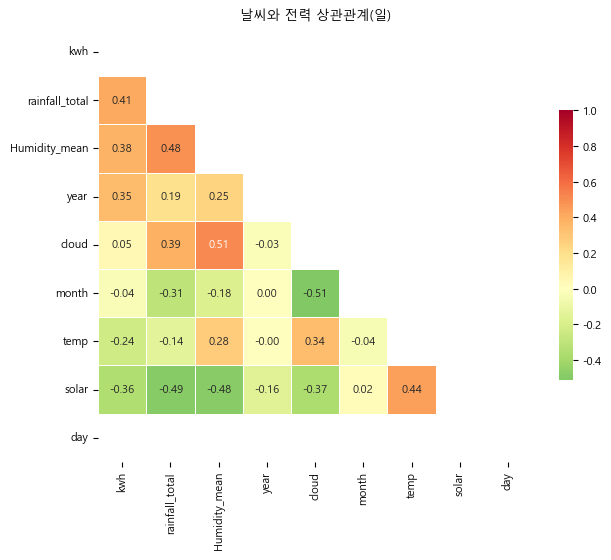

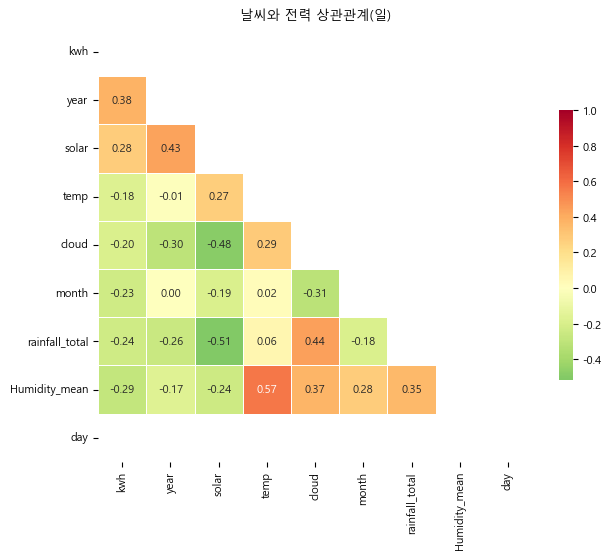

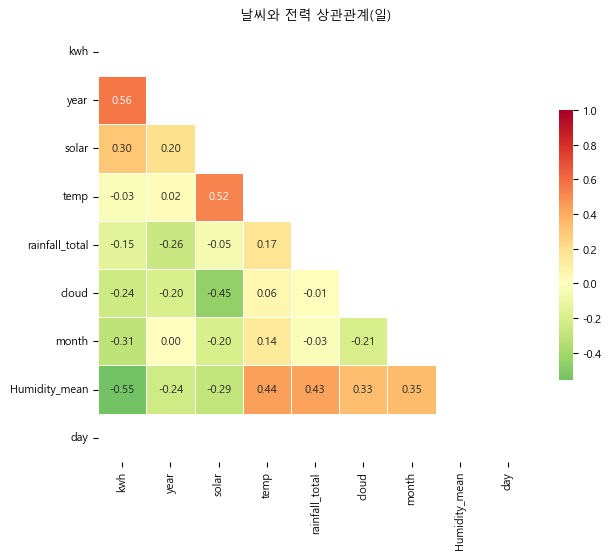

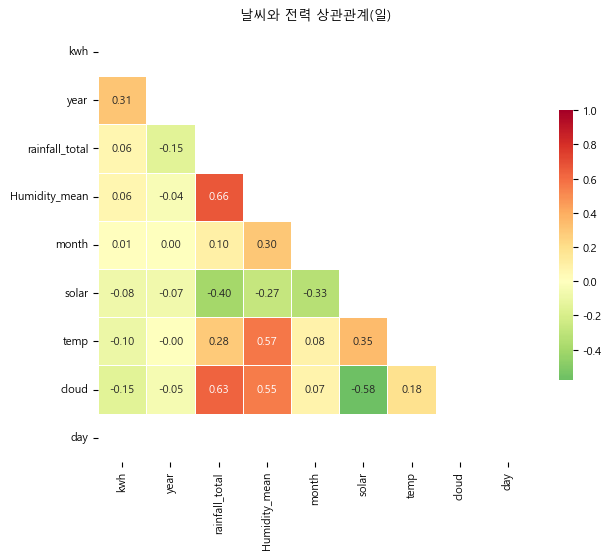

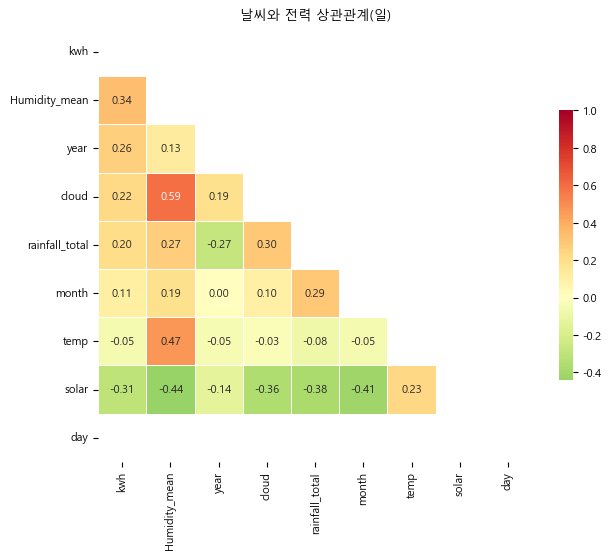

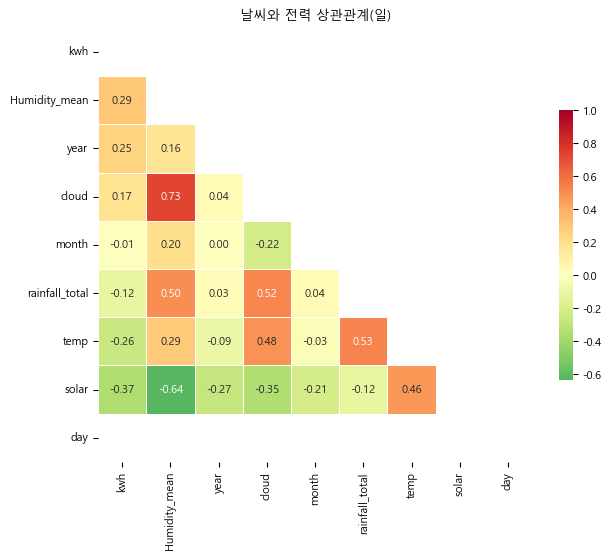

In [17]:
# 상관관계의 시각적 표현
for i, item in enumerate(day_dic):
    num = i + 1
    
    kw_matrix = item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(7, 7))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("날씨와 전력 상관관계 일별 관계(1일~31일)")

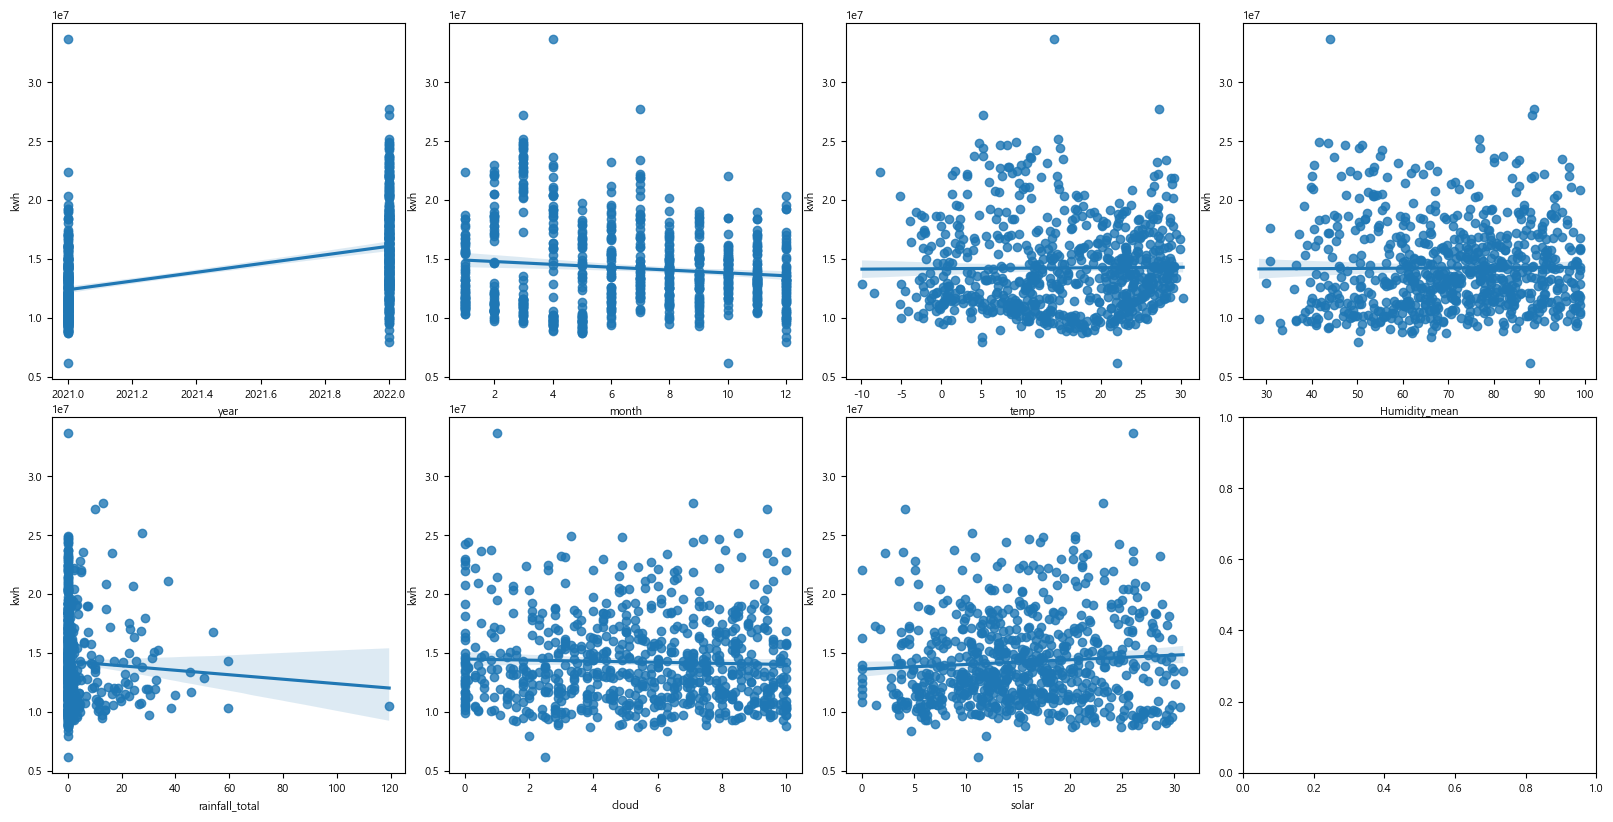

In [18]:
# 각 날씨 데이터와 전력과의 산점도를 확인하여 관계를 확인
lm_features = ['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
plt.tight_layout()
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'kwh', data = kw_df, ax = axs[row][col])

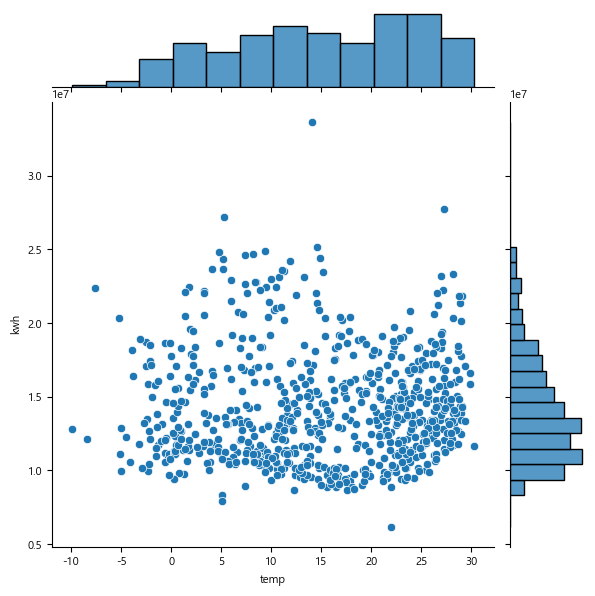

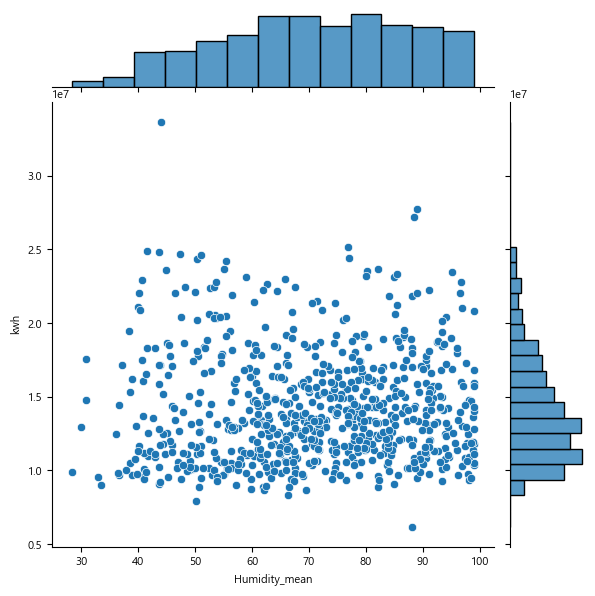

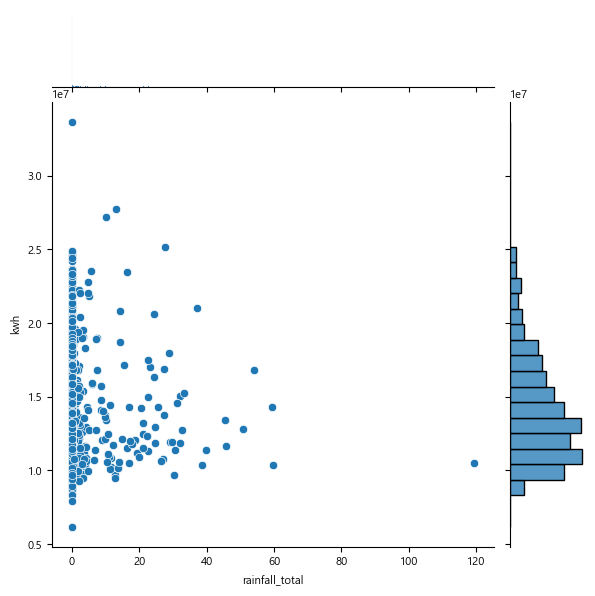

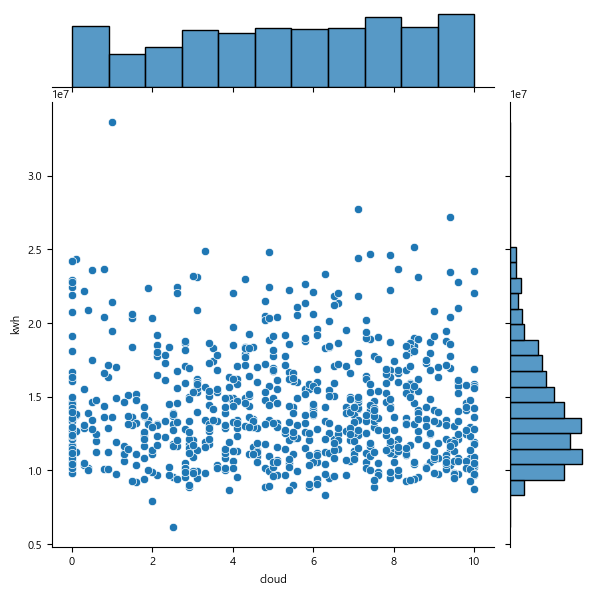

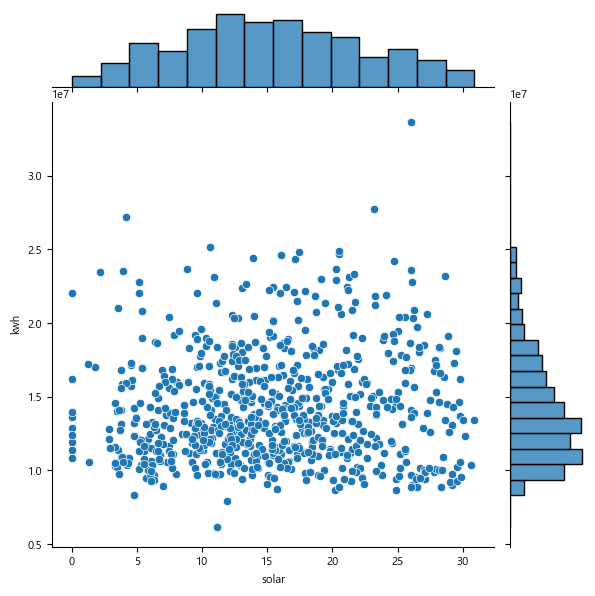

In [19]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar']

for feature in weather_df:
    sns.jointplot(x = feature, y = 'kwh', data = df)

# 일별 전력 사용량 그래프

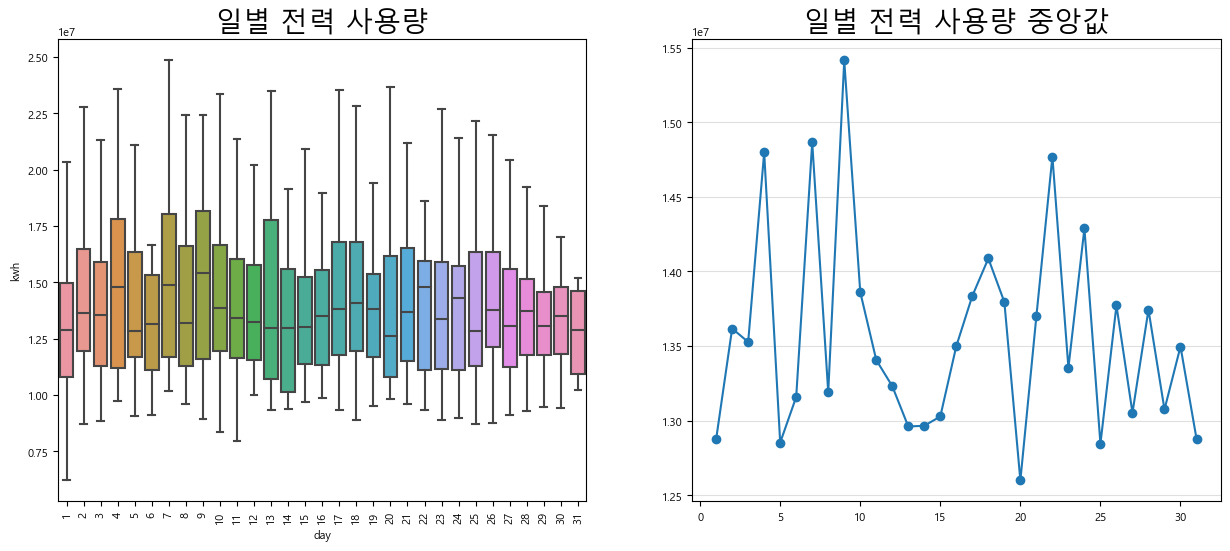

In [20]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="day", y="kwh", data=kw_df, showfliers=False)
g.set_title('일별 전력 사용량', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(kw_df.groupby('day')['kwh'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('일별 전력 사용량 중앙값', size = 20)
plt.show()

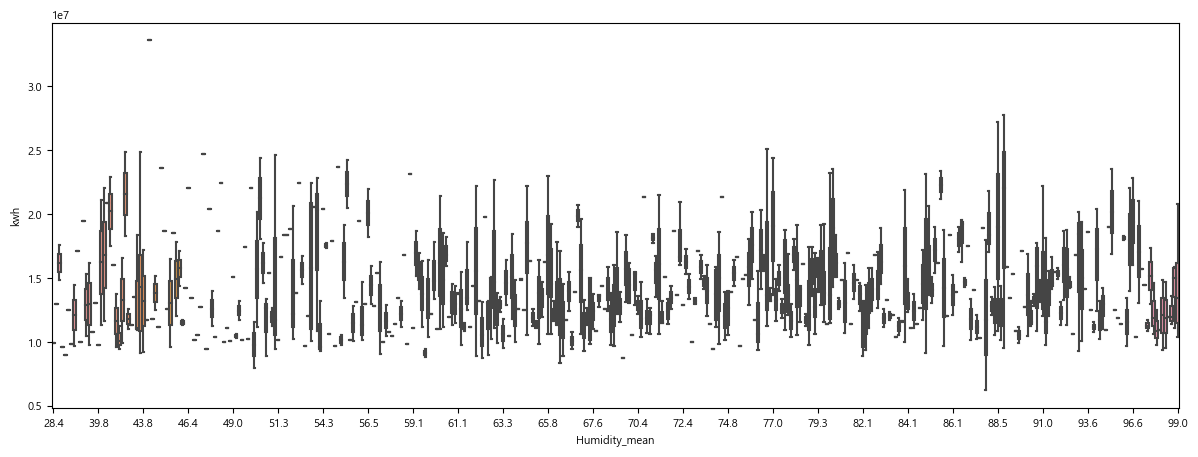

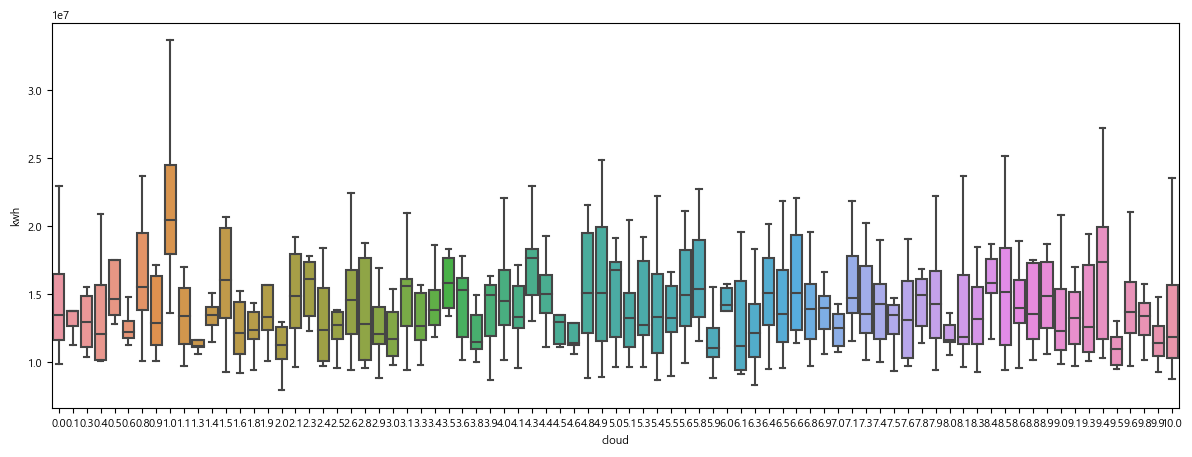

In [21]:
# boxplot 그래프확인
plt.figure(figsize=(32,5)) # 그래프 크기 조정 
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='Humidity_mean', y='kwh', data = kw_df, showfliers=False)
ax.xaxis.set_major_locator(plt.MultipleLocator(15))

plt.figure(figsize=(32,5), ) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
plt.xlabel(xlabel = '운량')
ax = sns.boxplot(x='cloud', y='kwh', data = kw_df, showfliers=False)

plt.show()

In [22]:
kw_df_year_month_day = df.pivot_table(index=['month'], 
                                     columns='day',
                                     values='kwh', 
                                     aggfunc='sum')
kw_df_year_month_day

day             1            2            3            4            5   \
month                                                                    
1      21924744.84  26440046.20  26074029.46  29287287.38  28219811.70   
2      22895338.06  32469746.59  28254555.62  29294151.82  28616964.08   
3      30392843.69  35231834.65  32321892.68  34489694.99  35826242.30   
4      32644171.15  34569349.99  30653352.98  33323073.89  31272415.26   
5      27033443.58  25438913.95  26941573.52  29289014.51  23688549.83   
6      19728230.06  25777572.90  29727575.35  28024767.84  24150214.87   
7      35128467.98  29225867.31  32113913.72  38216032.50  28731915.66   
8      28608079.22  25912928.89  28242517.57  32803767.93  36366650.69   
9      24870903.43  23007591.88  25223327.25  20979580.46  22600527.26   
10     21050310.76  28691906.33  27053991.64  29804931.48  25161451.19   
11     29353650.34  33799522.33  25683846.37  27813431.69  25751864.72   
12     28699724.37  28570096.57  27263255.65  23759121.28  26615072.10   

day             6            7            8            9            10  ...  \
month                                                                   ...   
1      25956920.41  24864321.03  25984877.53  37956215.01  27841557.44  ...   
2      23559656.50  29272881.93  33535249.74  32173645.38  27883830.22  ...   
3      33012149.94  35340364.02  31962235.87  33542737.81  32764613.32  ...   
4      32135184.04  49528390.20  30478572.98  28859551.81  28520561.64  ...   
5      25432890.91  28005449.39  25732159.02  24482457.71  25972095.03  ...   
6      25446951.44  30226856.45  25393717.66  27083860.49  28749633.64  ...   
7      32362830.73  33589593.74  35085235.81  31299771.87  36457898.66  ...   
8      30978372.22  28988503.50  27570424.60  35055115.71  26632945.26  ...   
9      21983894.46  29788316.31  27056131.60  25146171.70  24229034.09  ...   
10     30360772.27  30340798.56  36877316.13  38069985.50  32063947.31  ...   
11     26316925.27  26248400.57  26814850.24  28136384.63  27568166.82  ...   
12     27522763.36  29839184.67  23471786.32  24908181.79  27524815.37  ...   

day             22           23           24           25           26  \
month                                                                    
1      26218347.15  23056740.80  26564698.65  23915237.39  30894179.84   
2      25168560.86  27653222.74  29066624.52  34269577.12  32587204.52   
3      35896370.55  33528193.63  31953519.62  35501660.58  31209826.75   
4      28452480.68  26244119.22  27006268.29  25804498.31  24789697.42   
5      23986956.53  23274601.33  24145339.97  28446170.46  22190624.19   
6      38519113.54  32277135.01  31105317.93  26247487.10  30708070.77   
7      28767056.55  30180428.27  35160736.13  26862067.49  29526700.77   
8      24794833.08  24369037.89  27234035.22  29367153.49  26686834.51   
9      33828759.09  31901421.46  30714431.16  23870806.57  31363687.33   
10     29316293.98  27897756.52  23670163.52  25860145.29  28437027.11   
11     32415746.28  29109773.87  25128492.70  28172760.79  25506140.90   
12     21951632.82  21816545.10  26633041.14  29626863.13  32407574.04   

day             27           28           29           30           31  
month                                                                   
1      29349781.24  30281126.07  25748576.40  25754063.79  25604966.23  
2      34219382.76  32656364.64          NaN          NaN          NaN  
3      32587189.75  34568079.48  33897638.88  33973683.09  33309703.09  
4      30003567.31  28486544.19  26630836.10  25272002.67          NaN  
5      21416446.02  27207185.72  22352598.38  21593257.13  21332310.31  
6      31265894.89  29513037.19  26868613.63  32055531.40          NaN  
7      25118346.43  28230581.09  25091235.14  26144102.33  24915785.04  
8      26042453.03  30050092.31  26102980.78  25970545.64  25464423.87  
9      27569280.59  25537234.64  29572342.78  27534737.62          NaN  
10     28198604.

In [23]:
kw_df_year_month_day.rename(columns={
                                    1	: '1일',
                                    2	: '2일',
                                    3	: '3일',
                                    4	: '4일',
                                    5	: '5일',
                                    6	: '6일',
                                    7	: '7일',
                                    8	: '8일',
                                    9	: '9일',
                                    10	: '10일',
                                    11	: '11일',
                                    12	: '12일',
                                    13	: '13일',
                                    14	: '14일',
                                    15	: '15일',
                                    16	: '16일',
                                    17	: '17일',
                                    18	: '18일',
                                    19	: '19일',
                                    20	: '20일',
                                    21	: '21일',
                                    22	: '22일',
                                    23	: '23일',
                                    24	: '24일',
                                    25	: '25일',
                                    26	: '26일',
                                    27	: '27일',
                                    28	: '28일',
                                    29	: '29일',
                                    30	: '30일',
                                    31	: '31일'},
                                    inplace=True)

# 일별 전력 사용량

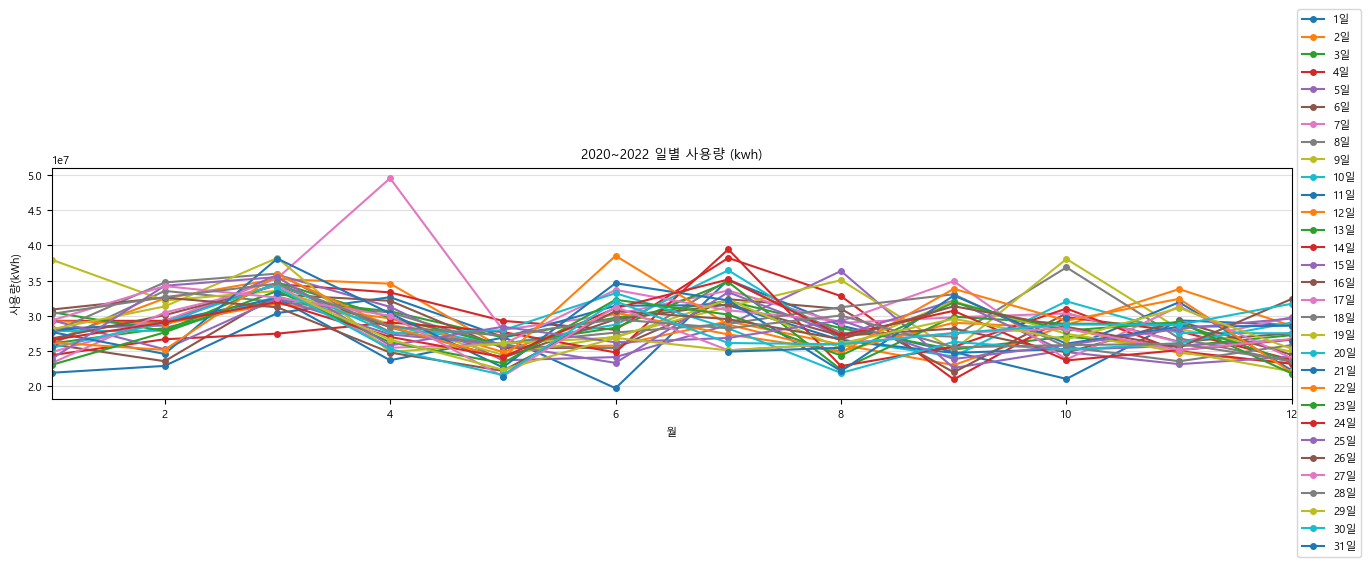

In [24]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_day, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_day.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2020~2022 일별 사용량 (kwh)')
plt.xlabel('월')
plt.ylabel('사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()

# 각 컬럼과의 상관 관계도

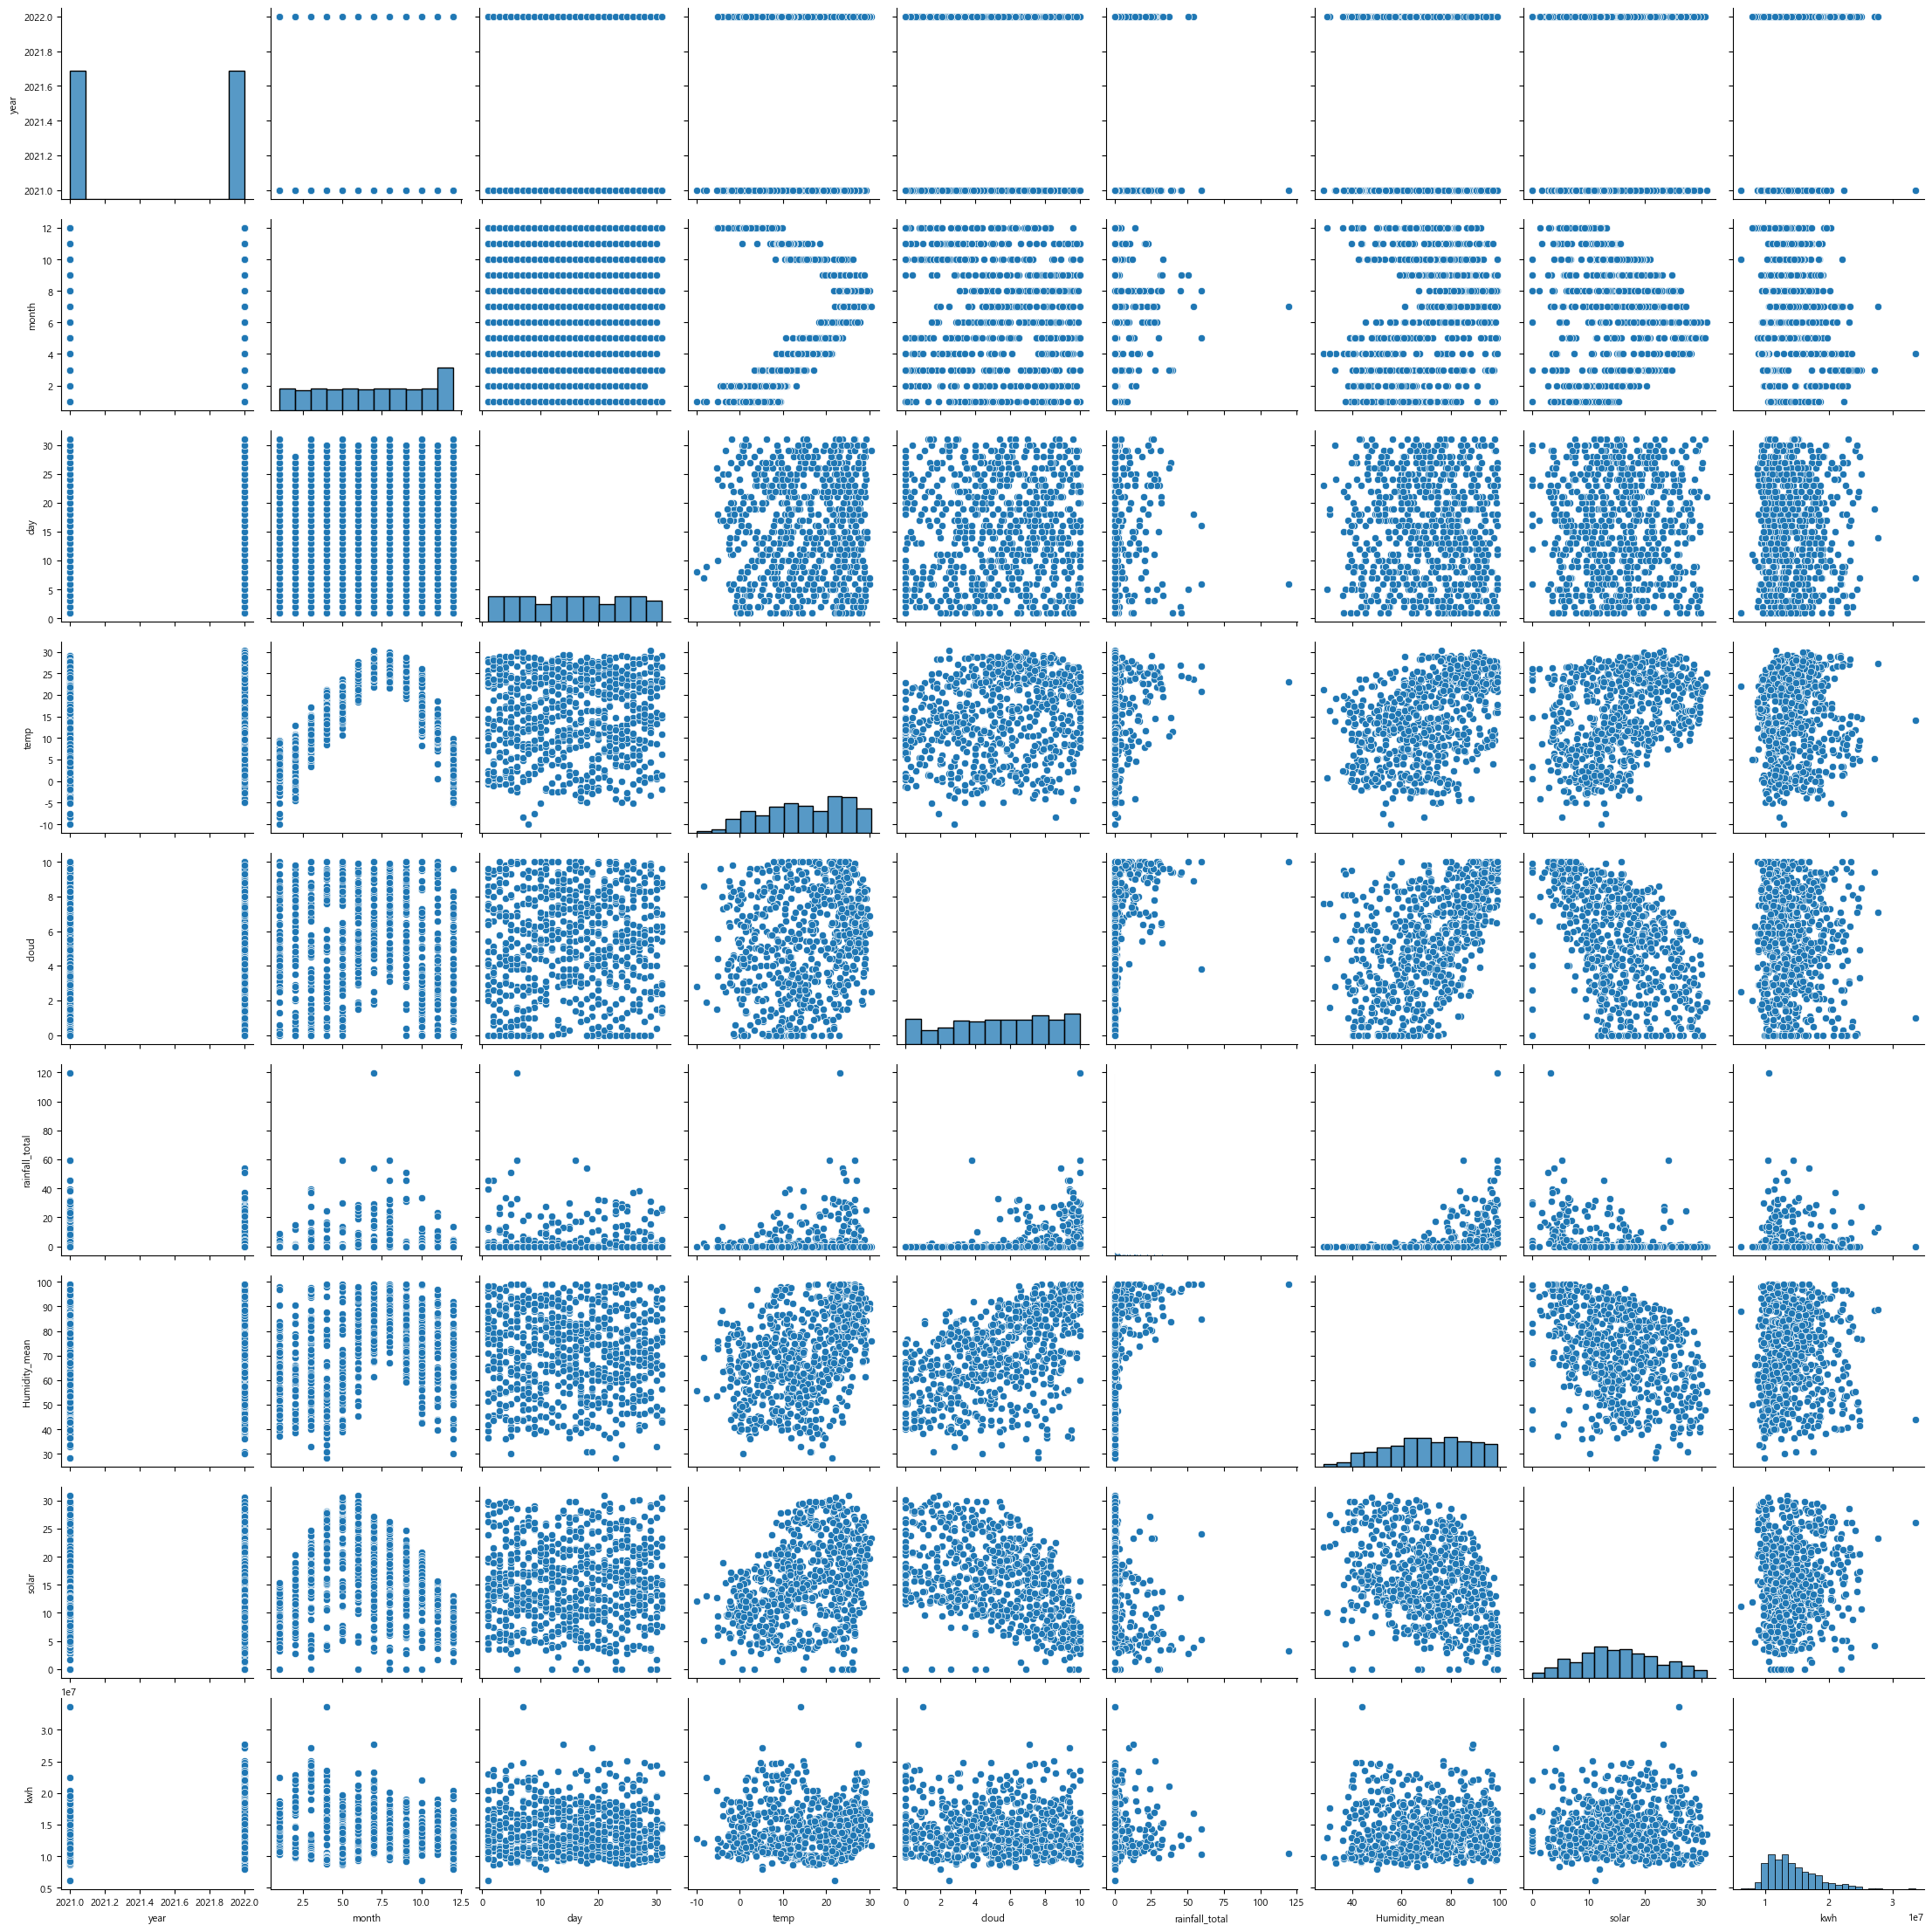

In [71]:
# pairplot 사용
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'kwh']
sns.pairplot(df[cols])
plt.show()

In [26]:
df

year  month  day  temp  cloud  rainfall_total  Humidity_mean  solar  \
0    2021      1    1  -0.6    7.3             0.0           83.1   9.00   
1    2021      1    2  -0.3    3.8             0.5           67.8  12.54   
2    2021      1    3  -0.6    7.3             0.0           54.6  10.37   
3    2021      1    4   1.2    3.1             0.0           71.8  10.07   
4    2021      1    5  -0.2    8.0             0.0           64.9   7.74   
..    ...    ...  ...   ...    ...             ...            ...    ...   
725  2022     12   27   0.3    1.8             0.0           74.1  13.08   
726  2022     12   28  -0.2    5.3             0.0           75.4   9.62   
727  2022     12   29   0.7    2.1             0.0           63.3  12.25   
728  2022     12   30   1.0    6.3             0.0           70.4   9.25   
729  2022     12   31   1.4    1.4             0.0           66.1  12.02   

             kwh  
0    11154070.87  
1    10820313.94  
2    10577876.27  
3    11410542.58  
4    11097614.74  
..           ...  
725   9442942.40  
726   9679363.18  
727  11754265.48  
728  12149583.10  
729  11472992.97  

[730 rows x 9 columns]

# 전력 예측

In [27]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

tensorflow Sequential 모델 사용

In [28]:
cols_train = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar']
X_train_pre = df[cols_train]
y = df['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [29]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [31]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=200)

modelpath = 'vkwd1.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 13ms/step - loss: 213308258910208.0000 - val_loss: 213827362750464.0000
Epoch 2/4000
14/14 [==============================] - 0s 4ms/step - loss: 213303880056832.0000 - val_loss: 213822967119872.0000
Epoch 3/4000
14/14 [==============================] - 0s 4ms/step - loss: 213298511347712.0000 - val_loss: 213816222679040.0000
Epoch 4/4000
14/14 [==============================] - 0s 4ms/step - loss: 213290391175168.0000 - val_loss: 213806055686144.0000
Epoch 5/4000
14/14 [==============================] - 0s 4ms/step - loss: 213277539827712.0000 - val_loss: 213789580460032.0000
Epoch 6/4000
14/14 [==============================] - 0s 4ms/step - loss: 213256920629248.0000 - val_loss: 213763676438528.0000
Epoch 7/4000
14/14 [==============================] - 0s 4ms/step - loss: 213224960032768.0000 - val_loss: 213723243347968.0000
Epoch 8/4000
14/14 [==============================] - 0s 4ms/step - loss: 213175467245568.0000 - val_lo

In [32]:
real_kwh = []
pred_kwh = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh.append(real)
    pred_kwh.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

5/5 [==============================] - 0s 751us/step
실제 전력 : 23212755.22, 예상전력 : 14443572.00
실제 전력 : 10988331.94, 예상전력 : 14239919.00
실제 전력 : 14561277.42, 예상전력 : 14162316.00
실제 전력 : 11771335.52, 예상전력 : 14279319.00
실제 전력 : 12915492.11, 예상전력 : 13975005.00
실제 전력 : 9425534.27, 예상전력 : 14404182.00
실제 전력 : 20201449.32, 예상전력 : 14490641.00
실제 전력 : 12417645.54, 예상전력 : 13733407.00
실제 전력 : 10599922.95, 예상전력 : 14244497.00
실제 전력 : 9880064.72, 예상전력 : 14113582.00
실제 전력 : 14344592.27, 예상전력 : 14335805.00
실제 전력 : 13049646.04, 예상전력 : 14439730.00
실제 전력 : 9374466.34, 예상전력 : 14440055.00
실제 전력 : 22226321.58, 예상전력 : 14394531.00
실제 전력 : 15432156.83, 예상전력 : 14416753.00
실제 전력 : 14399300.56, 예상전력 : 14313390.00
실제 전력 : 12295603.50, 예상전력 : 14519355.00
실제 전력 : 13539009.79, 예상전력 : 13751086.00
실제 전력 : 15943062.88, 예상전력 : 14434923.00
실제 전력 : 11207579.60, 예상전력 : 14170749.00
실제 전력 : 21194983.74, 예상전력 : 14491507.00
실제 전력 : 10560015.07, 예상전력 : 13801800.00
실제 전력 : 33619790.70, 예상전력 : 14174109.00
실제 전력 : 11774565.78, 예상전력 : 14

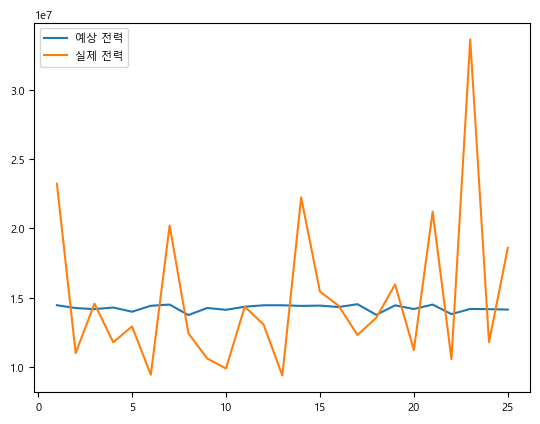

In [33]:
plt.plot(X_num, pred_kwh, label = '예상 전력')
plt.plot(X_num, real_kwh, label = '실제 전력')
plt.legend()
plt.show()

기온에 따른 변화량이 있어서 kwh 가장 적은 값에 따른 기온 값을 빼서 절대값으로 변수 사용 

In [34]:
def temp_v2(temp):
    temp_v = abs(temp - 22.0)
    return temp_v

In [35]:
df['temp_v'] = df['temp'].apply(lambda x: temp_v2(x))

Text(0.5, 1.0, '날씨(온도지수)와 전력 상관관계')

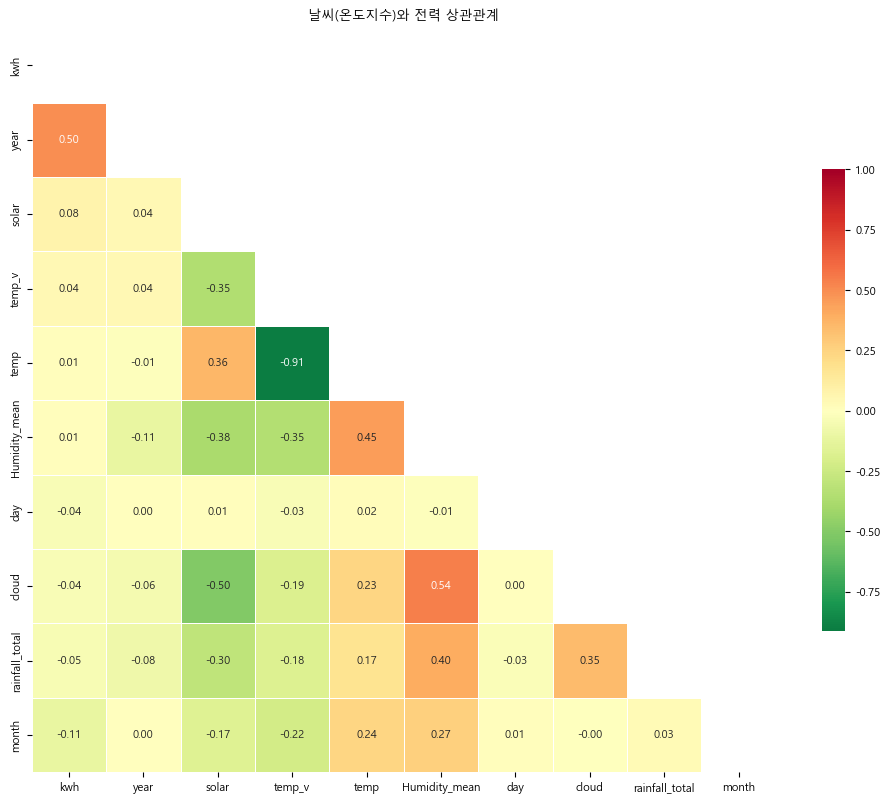

In [36]:
kw_matrix = df.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날씨(온도지수)와 전력 상관관계")

In [37]:
df_corr = df.corr()
df_corr_sort = df_corr.sort_values('kwh', ascending=False)
df_corr_sort.head(10)

year         month           day      temp     cloud  \
kwh             4.952599e-01 -1.117832e-01 -3.503801e-02  0.010067 -0.036037   
year            1.000000e+00  7.923551e-13  9.339728e-14 -0.014896 -0.056904   
solar           4.191976e-02 -1.712911e-01  8.487703e-03  0.363903 -0.502836   
temp_v          4.410543e-02 -2.245346e-01 -3.416230e-02 -0.913756 -0.186121   
temp           -1.489575e-02  2.364771e-01  1.888007e-02  1.000000  0.234163   
Humidity_mean  -1.066792e-01  2.661744e-01 -1.242073e-02  0.449717  0.540440   
day             9.339728e-14  1.189318e-02  1.000000e+00  0.018880  0.002274   
cloud          -5.690377e-02 -2.294342e-03  2.274415e-03  0.234163  1.000000   
rainfall_total -8.206610e-02  3.336828e-02 -2.686715e-02  0.173773  0.348429   
month           7.923551e-13  1.000000e+00  1.189318e-02  0.236477 -0.002294   

                rainfall_total  Humidity_mean     solar       kwh    temp_v  
kwh                  -0.045255       0.008614  0.075289  1.000000  0.042116  
year                 -0.082066      -0.106679  0.041920  0.495260  0.044105  
solar                -0.295780      -0.381615  1.000000  0.075289 -0.353159  
temp_v               -0.181078      -0.345918 -0.353159  0.042116  1.000000  
temp                  0.173773       0.449717  0.363903  0.010067 -0.913756  
Humidity_mean         0.395061       1.000000 -0.381615  0.008614 -0.345918  
day                  -0.026867      -0.012421  0.008488 -0.035038 -0.034162  
cloud                 0.348429       0.540440 -0.502836 -0.036037 -0.186121  
rainfall_total        1.000000       0.395061 -0.295780 -0.045255 -0.181078  
month                 0.033368       0.266174 -0.171291 -0.111783 -0.224535

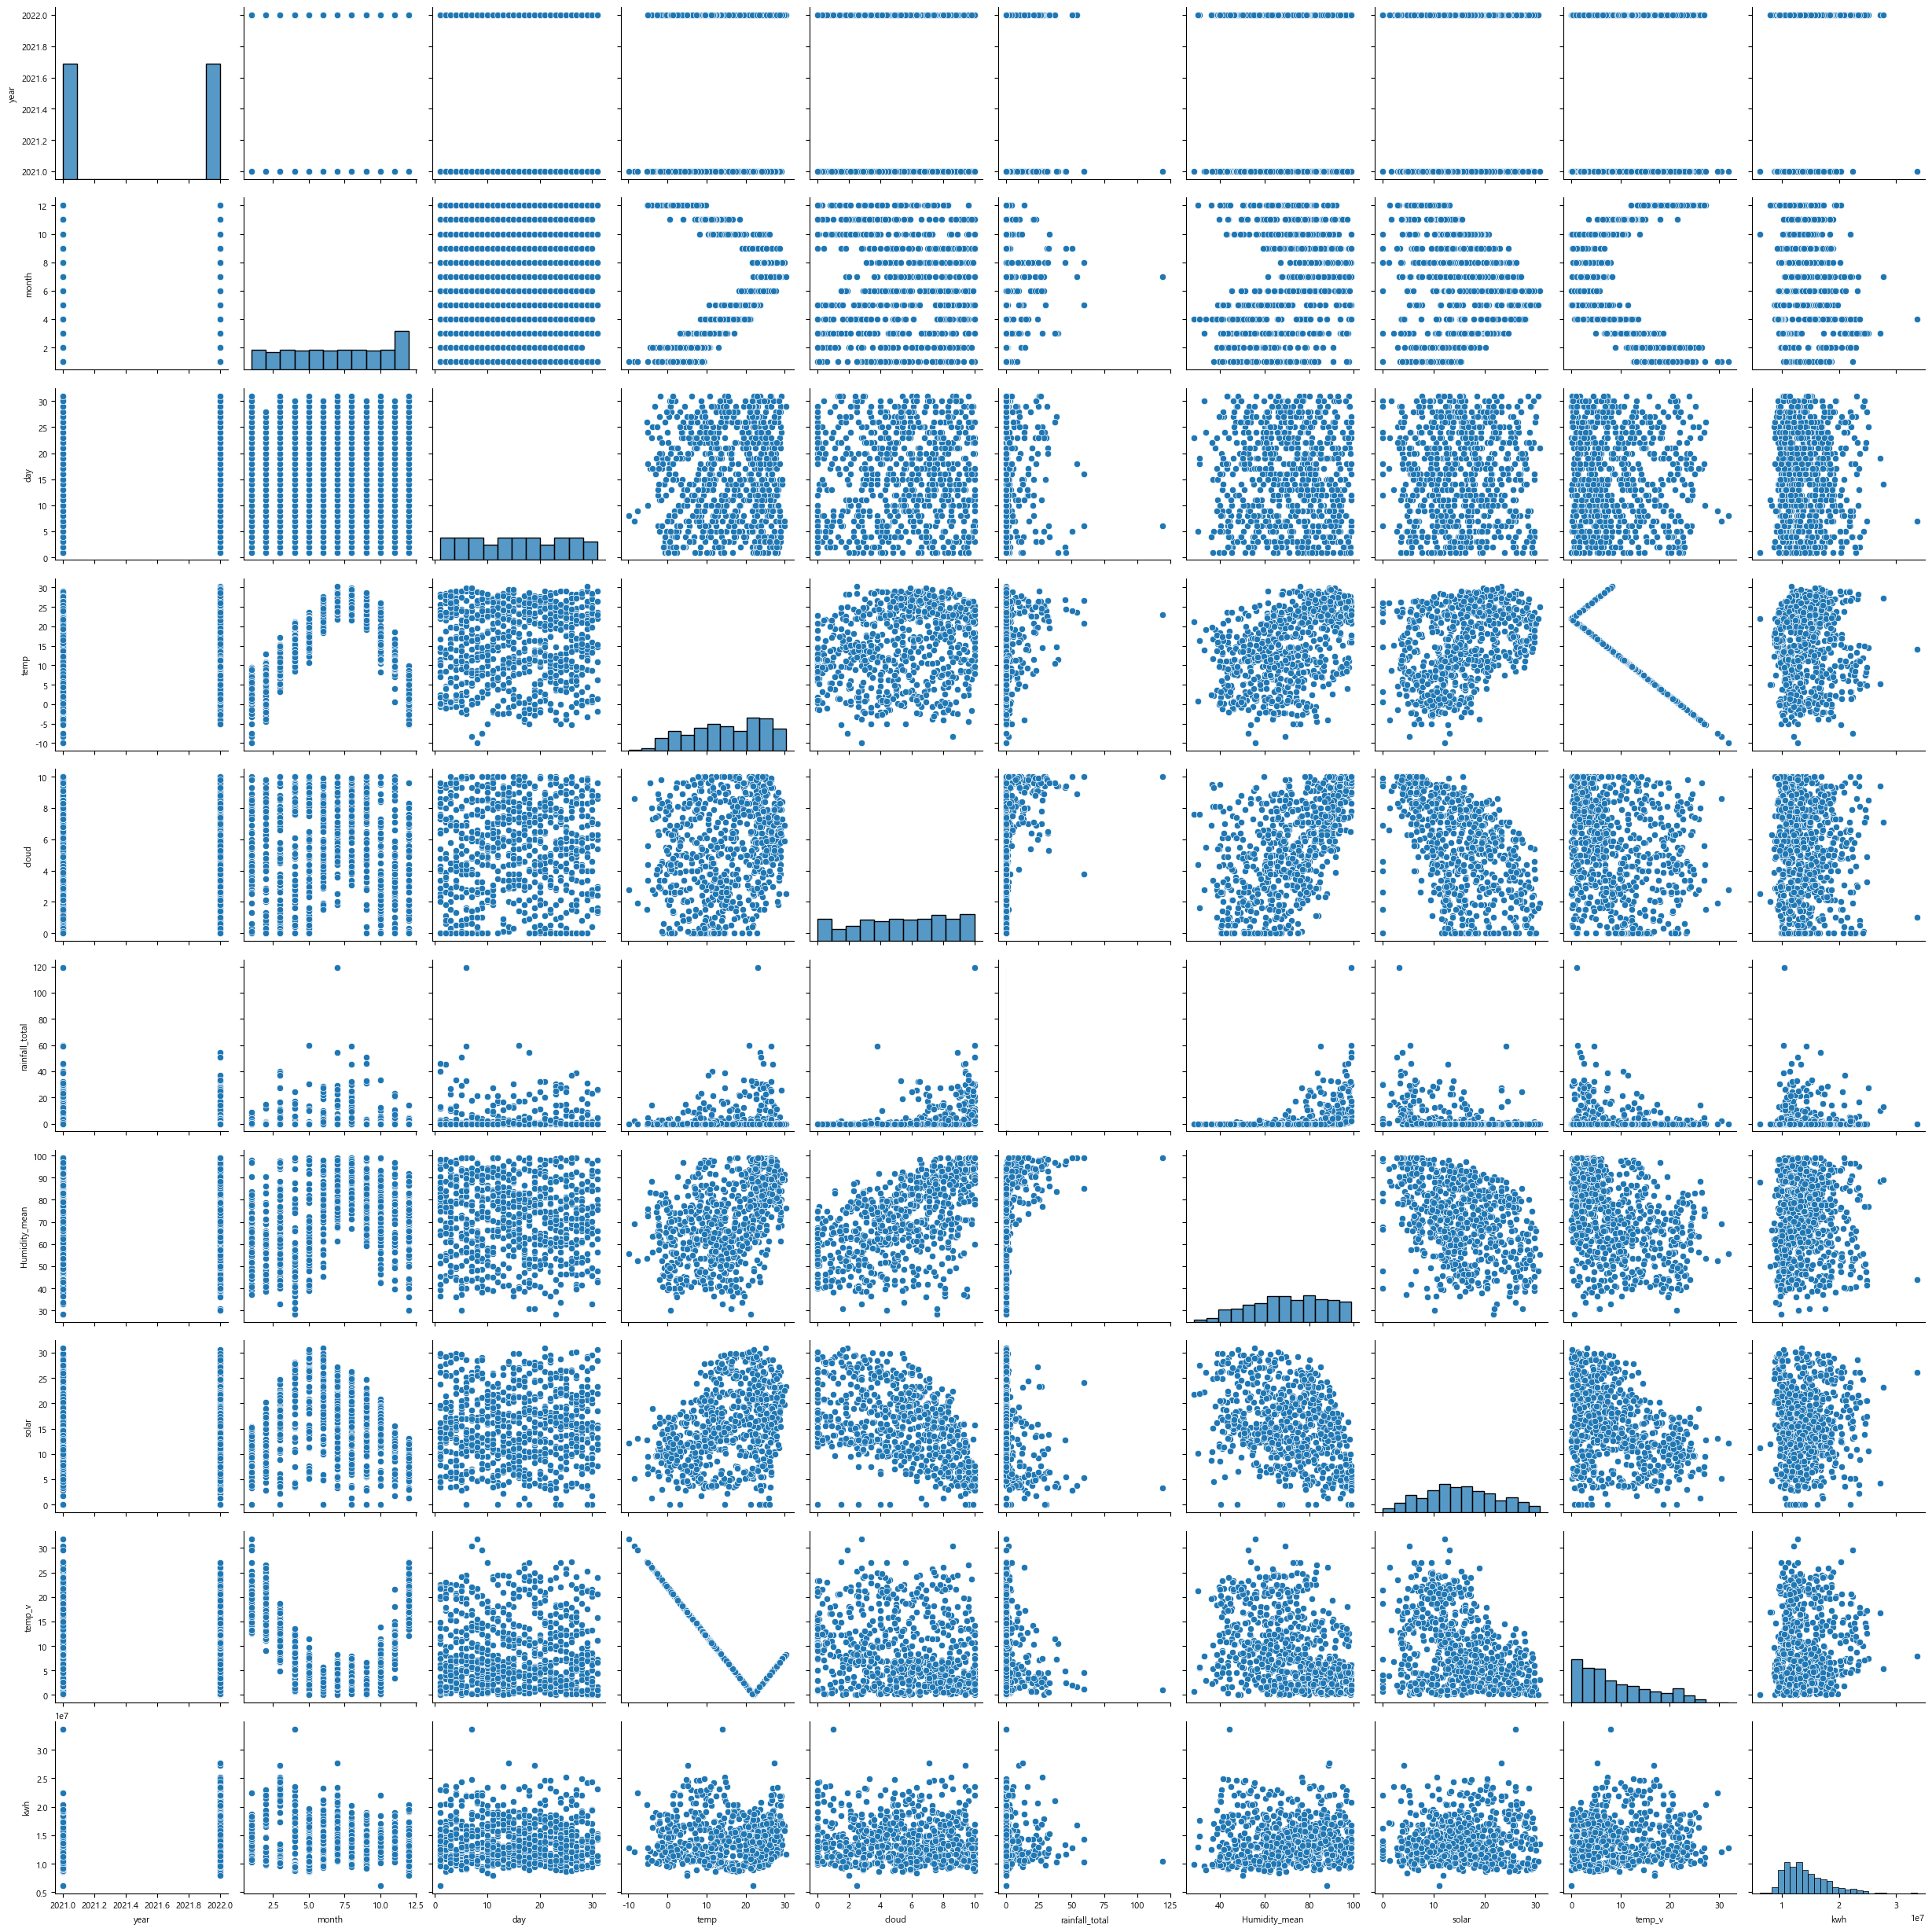

In [70]:
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'temp_v', 'kwh']
sns.pairplot(df[cols])
plt.show()

In [39]:
cols_train = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'temp_v']
X_train_pre = df[cols_train]
y = df['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [40]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                100       
                                                                 
 dense_5 (Dense)             (None, 30)                330       
                                                                 
 dense_6 (Dense)             (None, 40)                1240      
                                                                 
 dense_7 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,711
Trainable params: 1,711
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=200)

modelpath = 'vkwd2.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 11ms/step - loss: 212783283044352.0000 - val_loss: 217238187540480.0000
Epoch 2/4000
14/14 [==============================] - 0s 4ms/step - loss: 212760768020480.0000 - val_loss: 217212249964544.0000
Epoch 3/4000
14/14 [==============================] - 0s 4ms/step - loss: 212730988462080.0000 - val_loss: 217175994400768.0000
Epoch 4/4000
14/14 [==============================] - 0s 4ms/step - loss: 212688525328384.0000 - val_loss: 217123297165312.0000
Epoch 5/4000
14/14 [==============================] - 0s 5ms/step - loss: 212626164416512.0000 - val_loss: 217045467660288.0000
Epoch 6/4000
14/14 [==============================] - 0s 4ms/step - loss: 212534577594368.0000 - val_loss: 216932154343424.0000
Epoch 7/4000
14/14 [==============================] - 0s 4ms/step - loss: 212402306023424.0000 - val_loss: 216771059515392.0000
Epoch 8/4000
14/14 [==============================] - 0s 4ms/step - loss: 212215927930880.0000 - val_lo

In [43]:
real_kwh = []
pred_kwh = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh.append(real)
    pred_kwh.append(prediction)
    n_iter += 1
    X_num.append(n_iter)

5/5 [==============================] - 0s 1ms/step
실제 전력 : 9880064.72, 예상전력 : 14022662.00
실제 전력 : 11683753.69, 예상전력 : 13049441.00
실제 전력 : 18657965.80, 예상전력 : 14449549.00
실제 전력 : 14932870.59, 예상전력 : 13733121.00
실제 전력 : 10560015.07, 예상전력 : 13499986.00
실제 전력 : 10212886.76, 예상전력 : 14163444.00
실제 전력 : 13408822.34, 예상전력 : 14439446.00
실제 전력 : 12113821.35, 예상전력 : 13949956.00
실제 전력 : 20626706.22, 예상전력 : 14120240.00
실제 전력 : 14867617.14, 예상전력 : 14127382.00
실제 전력 : 10086434.16, 예상전력 : 14066182.00
실제 전력 : 15061180.54, 예상전력 : 13741697.00
실제 전력 : 19013522.82, 예상전력 : 14131390.00
실제 전력 : 9712601.53, 예상전력 : 14309892.00
실제 전력 : 17427097.77, 예상전력 : 14002701.00
실제 전력 : 11455751.74, 예상전력 : 14556668.00
실제 전력 : 13883899.41, 예상전력 : 13788954.00
실제 전력 : 13792130.65, 예상전력 : 13897728.00
실제 전력 : 15011622.00, 예상전력 : 13781901.00
실제 전력 : 9516881.62, 예상전력 : 14376325.00
실제 전력 : 11464543.31, 예상전력 : 14535800.00
실제 전력 : 15720956.50, 예상전력 : 14315283.00
실제 전력 : 24849729.47, 예상전력 : 14322590.00
실제 전력 : 8862356.46, 예상전력 : 14533

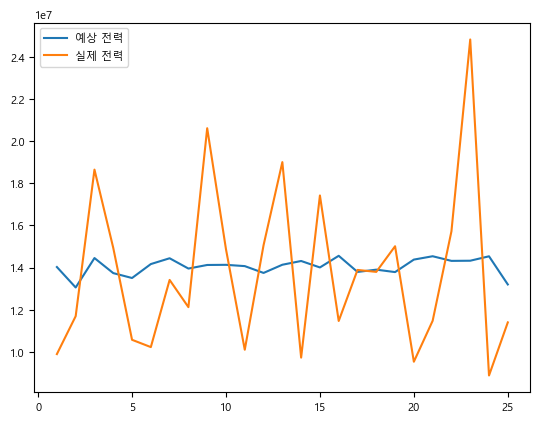

In [44]:
plt.plot(X_num, pred_kwh, label = '예상 전력')
plt.plot(X_num, real_kwh, label = '실제 전력')
plt.legend()
plt.show()

autogluon TabularPredictor사용 최적화 모델 찾기 

In [45]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [46]:
day_df = pd.read_csv('usage_by_weather2.csv')
day_df.drop(columns=['Unnamed: 0', 'customer', 'wh'], inplace=True)

In [47]:

X_train_pre = day_df
y = day_df['kwh'].values
# X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)
train = X_train_pre.iloc[:-200]
test = X_train_pre.iloc[-200:]

In [48]:
predictor = TabularPredictor(label='kwh').fit(train)

No path specified. Models will be saved in: "AutogluonModels\ag-20230331_002525\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels\ag-20230331_002525\"
AutoGluon Version:  0.7.0
Python Version:     3.9.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22000
Train Data Rows:    530
Train Data Columns: 8
Label Column: kwh
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (33619790.7, 6200904.63, 14082068.84258, 3903941.8419)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6503.56 MB
	Train Data (O

# 최적화 모델은 WeightedEnsemble_L2

In [49]:
train1 = test['kwh'].reset_index(drop=True)

In [50]:
test_preds = predictor.predict(test)
test_preds.reset_index(drop=True, inplace=True)

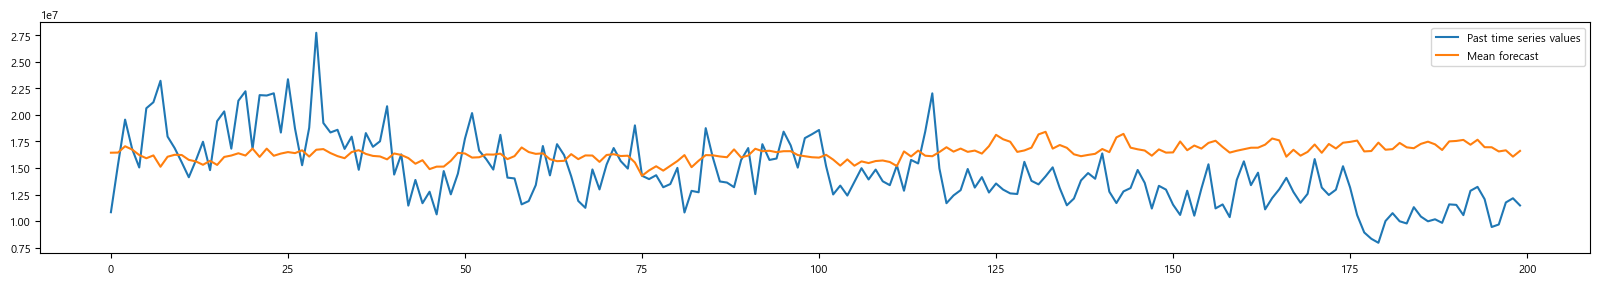

In [51]:
plt.figure(figsize=(20, 3))

plt.plot(train1, label="Past time series values")
plt.plot(test_preds, label="Mean forecast")

plt.legend();

In [52]:
day_df_kw = df.drop(columns=['temp', 'cloud', 'rainfall_total', 'Humidity_mean', 'solar'])
day_df_kw

year  month  day          kwh  temp_v
0    2021      1    1  11154070.87    22.6
1    2021      1    2  10820313.94    22.3
2    2021      1    3  10577876.27    22.6
3    2021      1    4  11410542.58    20.8
4    2021      1    5  11097614.74    22.2
..    ...    ...  ...          ...     ...
725  2022     12   27   9442942.40    21.7
726  2022     12   28   9679363.18    22.2
727  2022     12   29  11754265.48    21.3
728  2022     12   30  12149583.10    21.0
729  2022     12   31  11472992.97    20.6

[730 rows x 5 columns]

In [53]:
# 상관관계 도출
corr_matrix = day_df_kw.corr()
corr_matrix = corr_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]
corr_matrix

kwh          year    temp_v           day         month
kwh     1.000000  4.952599e-01  0.042116 -3.503801e-02 -1.117832e-01
year    0.495260  1.000000e+00  0.044105  9.339728e-14  7.923551e-13
temp_v  0.042116  4.410543e-02  1.000000 -3.416230e-02 -2.245346e-01
day    -0.035038  9.339728e-14 -0.034162  1.000000e+00  1.189318e-02
month  -0.111783  7.923551e-13 -0.224535  1.189318e-02  1.000000e+00

Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

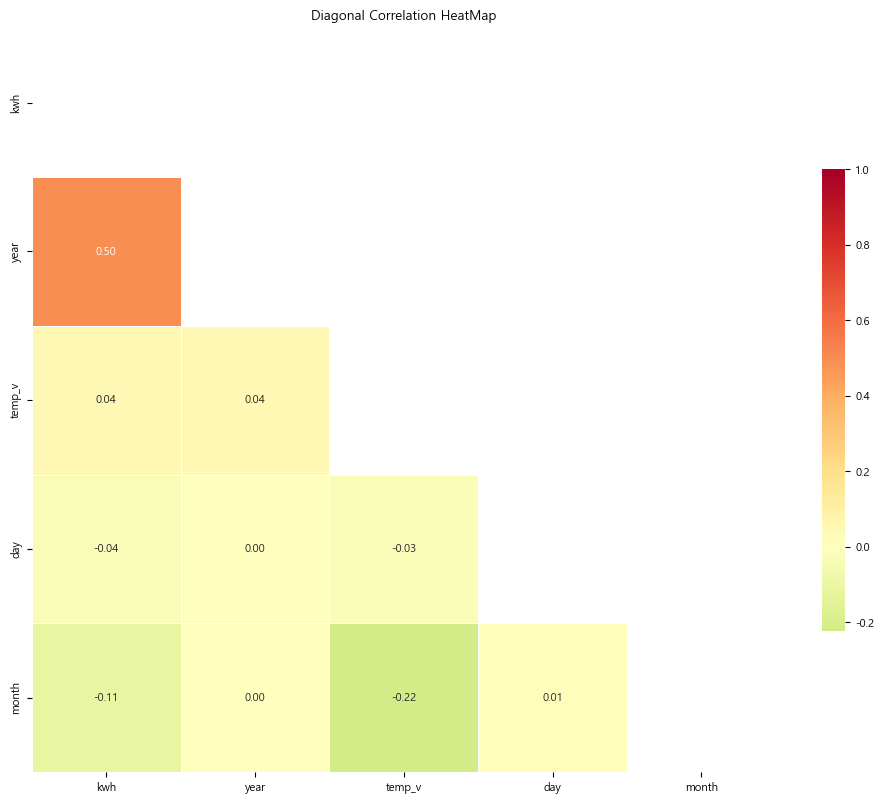

In [54]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = day_df_kw.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [55]:
day_df_kw['date'] = pd.to_datetime(day_df_kw[['year', 'month', 'day']])

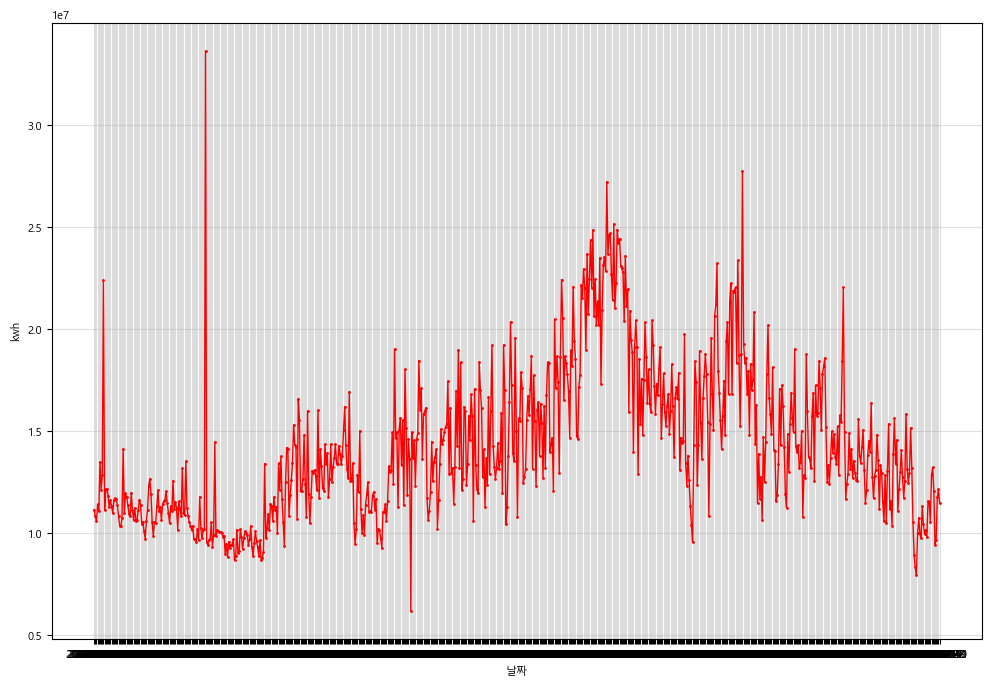

In [56]:
# 날짜에 따른 kwh 추이 시각화
plt.figure(figsize=(12,8))
plt.plot('date', 'kwh', data=day_df_kw, marker='o', markerfacecolor='blue',
         markersize=1, color='red', linewidth=1)
plt.xticks(day_df_kw['date']) # 날짜 표시
plt.grid(linestyle='-', alpha=0.4)
plt.ylabel('kwh')
plt.xlabel('날짜')
plt.show()

In [57]:
cols_train = ['year', 'month', 'day']
X_train_pre = day_df_kw[cols_train]
y = day_df_kw['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [58]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                40        
                                                                 
 dense_9 (Dense)             (None, 30)                330       
                                                                 
 dense_10 (Dense)            (None, 40)                1240      
                                                                 
 dense_11 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [60]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=200)

modelpath = 'vkd1.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 12ms/step - loss: 215620125720576.0000 - val_loss: 213992182120448.0000
Epoch 2/4000
14/14 [==============================] - 0s 5ms/step - loss: 215612676636672.0000 - val_loss: 213984716259328.0000
Epoch 3/4000
14/14 [==============================] - 0s 5ms/step - loss: 215604254474240.0000 - val_loss: 213975069360128.0000
Epoch 4/4000
14/14 [==============================] - 0s 4ms/step - loss: 215593198288896.0000 - val_loss: 213962452893696.0000
Epoch 5/4000
14/14 [==============================] - 0s 4ms/step - loss: 215578753105920.0000 - val_loss: 213945877004288.0000
Epoch 6/4000
14/14 [==============================] - 0s 4ms/step - loss: 215559576748032.0000 - val_loss: 213923915628544.0000
Epoch 7/4000
14/14 [==============================] - 0s 4ms/step - loss: 215534142488576.0000 - val_loss: 213894387728384.0000
Epoch 8/4000
14/14 [==============================] - 0s 4ms/step - loss: 215499984076800.0000 - val_lo

In [61]:
real_kwh2 = []
pred_kwh2 = []
X_num2 = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh2.append(real)
    pred_kwh2.append(prediction)
    n_iter += 1
    X_num2.append(n_iter)

5/5 [==============================] - 0s 750us/step
실제 전력 : 13290844.74, 예상전력 : 14227673.00
실제 전력 : 11764084.23, 예상전력 : 14184471.00
실제 전력 : 11632766.19, 예상전력 : 14199417.00
실제 전력 : 10827504.23, 예상전력 : 14136122.00
실제 전력 : 16772176.25, 예상전력 : 14259208.00
실제 전력 : 16185816.63, 예상전력 : 14243311.00
실제 전력 : 15092216.24, 예상전력 : 14292205.00
실제 전력 : 12458424.04, 예상전력 : 14196601.00
실제 전력 : 20888978.03, 예상전력 : 14184529.00
실제 전력 : 11950043.23, 예상전력 : 14261823.00
실제 전력 : 11386415.50, 예상전력 : 14179325.00
실제 전력 : 17271923.61, 예상전력 : 14300024.00
실제 전력 : 12106760.05, 예상전력 : 14251331.00
실제 전력 : 11297349.15, 예상전력 : 14180561.00
실제 전력 : 16012656.61, 예상전력 : 14213273.00
실제 전력 : 12589555.05, 예상전력 : 14242967.00
실제 전력 : 13191472.14, 예상전력 : 14218476.00
실제 전력 : 12964657.26, 예상전력 : 14226294.00
실제 전력 : 16044863.71, 예상전력 : 14220804.00
실제 전력 : 13515733.57, 예상전력 : 14236039.00
실제 전력 : 14319041.74, 예상전력 : 14310574.00
실제 전력 : 11754265.48, 예상전력 : 14316611.00
실제 전력 : 13111226.03, 예상전력 : 14202293.00
실제 전력 : 11663369.59, 예상전력 :

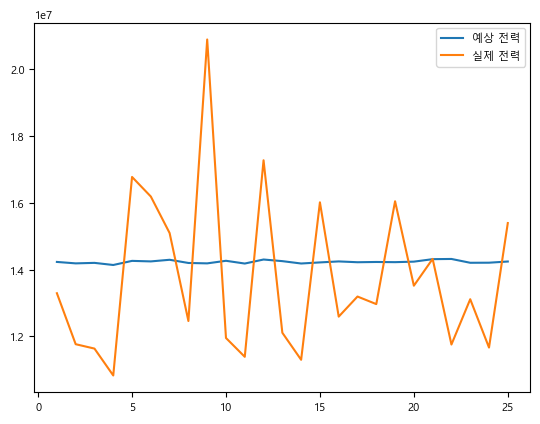

In [62]:
plt.plot(X_num2, pred_kwh2, label = '예상 전력')
plt.plot(X_num2, real_kwh2, label = '실제 전력')
plt.legend()
plt.show()

## 모델 교체

In [63]:
# 모델 평가식 정의
def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output

In [64]:
# Year, Month, Day 컬럼만 변수로 활용
X = day_df_kw.iloc[:,:3] 

In [65]:
y_s = day_df_kw.iloc[:,:4] 
y_s['kwh']

0      11154070.87
1      10820313.94
2      10577876.27
3      11410542.58
4      11097614.74
          ...     
725     9442942.40
726     9679363.18
727    11754265.48
728    12149583.10
729    11472992.97
Name: kwh, Length: 730, dtype: float64

RandomForestRegressor(랜덤포레스트 사용)

In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
# y값은 전력량으로 설정
y = y_s['kwh']

# 학습/검증 데이터셋 정의
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 42)

# 모델 정의
model = RandomForestRegressor(n_estimators = 20, random_state = 0, verbose = 0)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 평가
result = smape(y_val, y_pred)
result

10.584829895446966

위의 값은 smape 값

랜덤포레스트(Random Forest) 모델의 성능을 측정하는 지표 중 하나인 Symmetric Mean Absolute Percentage Error (SMAPE)은 실제값과 예측값의 차이를 비율로 계산한 후, 그 차이의 평균을 구하는 방식으로 smape를 사용

SMAPE는 다음과 같은 공식으로 계산됩니다.

SMAPE = (100 / n) * sum(|y - y_hat| / ((|y| + |y_hat|) / 2))

In [68]:
real_kwh2 = []
pred_kwh2 = []
X_num2 = []

n_iter = 0
y_prediction = model.predict(X_val).flatten()
for i in range(25):
    real = y_val.values[i]
    prediction = y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh2.append(real)
    pred_kwh2.append(prediction)
    n_iter += 1
    X_num2.append(n_iter)

실제 전력 : 19135174.09, 예상전력 : 15935583.10
실제 전력 : 9745642.88, 예상전력 : 12219454.29
실제 전력 : 14932870.59, 예상전력 : 14936153.30
실제 전력 : 10424313.28, 예상전력 : 17219200.59
실제 전력 : 10389815.95, 예상전력 : 12112564.39
실제 전력 : 15541533.18, 예상전력 : 13693941.74
실제 전력 : 10170177.04, 예상전력 : 11222101.74
실제 전력 : 10853492.22, 예상전력 : 10815360.83
실제 전력 : 9427237.72, 예상전력 : 9954079.69
실제 전력 : 15981043.45, 예상전력 : 16897104.35
실제 전력 : 14289218.09, 예상전력 : 15686141.39
실제 전력 : 10004384.45, 예상전력 : 9785778.85
실제 전력 : 10889998.51, 예상전력 : 11205638.94
실제 전력 : 20191737.02, 예상전력 : 19956921.52
실제 전력 : 14345261.45, 예상전력 : 13040070.04
실제 전력 : 9702953.98, 예상전력 : 10609603.30
실제 전력 : 18847353.03, 예상전력 : 18276192.27
실제 전력 : 11144786.22, 예상전력 : 11533213.67
실제 전력 : 14016939.48, 예상전력 : 13575129.60
실제 전력 : 9442716.28, 예상전력 : 10319326.73
실제 전력 : 16044863.71, 예상전력 : 16246999.78
실제 전력 : 24849729.47, 예상전력 : 23000654.10
실제 전력 : 13267265.40, 예상전력 : 12266890.27
실제 전력 : 17188119.82, 예상전력 : 19048405.10
실제 전력 : 14344592.27, 예상전력 : 12805754.65


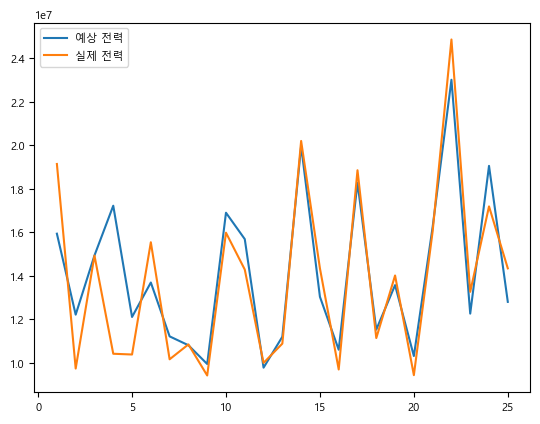

In [69]:
plt.plot(X_num2, pred_kwh2, label = '예상 전력')
plt.plot(X_num2, real_kwh2, label = '실제 전력')
plt.legend()
plt.show()